__Liudmila Semenova  
UDACITY Data Analyst Nanodegree Program  
2019, Jule 10__

# Wrangle and Analyze Data

- [Introduction](#intro)
- [Gathering data](#gathering)
    - [Twitter Archive](#twitter_archive_gathering)
    - [Image Predictions](#image_predictions_gathering)
    - [Tweets (Twitter API & JSON)](#tweets_gathering)
- [Assessing Data](#assessing)
    - [Twitter Archive](#twitter_archive_assessing)
    - [Image Predictions](#image_predictions_assessing)
    - [Tweets](#tweets_assessing)
- [Cleaning Data](#cleaning)
    - [Twitter Archive](#twitter_archive_cleaning)
    - [Image Predictions](#images_cleaning)
    - [Tweets](#tweets_cleaning)
- [Storing Data](#storing)
- [Analyzing and Visualizing Data](#analyzing)
- [Resources](#resources)

<a id='intro'></a>
## Introduction

The dataset used in this project is the tweet archive of twitter user @dog_rates, also known as WeRateDogs. It is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10, and the numerators are very often greater than 10. WeRateDogs has over 4 million followers and has received international media coverage.

The main goal of the project is wrangling WeRateDogs Twitter data to create interesting analysis and visualizations. 
Since the twitter archive contains very basic tweet information, there was additional data gathering for getting more useful for further analysis information.

In [748]:
import pandas as pd
import requests
import tweepy
import json
import sys
import time
import datetime
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from bs4 import BeautifulSoup as bs
%matplotlib inline

<a id='gathering'></a>
## Gathering Data

There are three data sources:


1. **`twitter_archive_enhanced.csv`** which is the WeRateDogs twitter account archive in csv-format and can be downloaded manually [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv). 
<br><br>
2. **`image_predictions.tsv`** with predictions what breed of dog (or other object, animal, etc.) is present in each tweet. This file should be downloaded programmatically using the Requests library from the [following url](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).
<br><br>
3. **`tweet_json.txt`** which should contain entire tweets from WeRateDogs Twitter archive since **`twitter_archive_enhanced.csv`** contains only basic information. **`tweet_json.txt`** should be created programmatically by quering the Twitter API for entire tweet's JSON data using the tweet IDs in the WeRateDogs Twitter archive and Python's Tweepy library, then storing all these JSON data in a txt-file; each tweet's JSON data should be written to its own line. Then this file should be written line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

<a id='twitter_archive_gathering'></a>
### Twitter Archive

In [1243]:
# create a dataframe from twitter_archive_enhanced.csv
archive = pd.read_csv('twitter_archive_enhanced.csv')

In [1244]:
# check the result 
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<a id='image_predictions_gathering'></a>
### Image Predictions

In [651]:
# download image_prediction tsv-file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url).content
with open('image_predictions.tsv', 'wb') as file:
    file.write(response)

In [1246]:
# create a dataframe from image_prediction.tsv
images = pd.read_csv('image_predictions.tsv', sep='\t' )

In [1247]:
# check the result
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='tweets_gathering'></a>
### Tweets (Twitter API & JSON)

In [42]:
# create an access to Twitter
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify=True, timeout = 60)

In [39]:
# download tweets to tweet_json.txt, count how many tweets were downloaded and how many were not found
# calculate processing time
errors = {}
count = 0
count_errors = 0
start = time.time()
with open('tweet_json.txt', 'w', encoding='utf-8') as file:   
    for tweet_id in archive.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
            count = count + 1
            print('{} - added to tweet_json.txt at {}'.format(tweet.id, datetime.datetime.now().strftime('%I:%M:%S %p')))            
        except tweepy.TweepError as err:
            count_errors = count_errors + 1
            errors[tweet.id] = err.args[0][0]['code']
            print('\n{} - {} (code error - {})\n'.format(err.args[0][0]['message'][:-1], tweet.id, err.args[0][0]['code']))
            
end = time.time()
print('\nTweets added to tweet_json.txt - {}\nTweets not found - {}\nProcessing time - {} min'.format(count, count_errors, int((end-start)/60)))

# write ids of tweets which were not found as dictonary to errors.txt 
with open('errors', 'w', encoding='utf-8') as file:
    file.write(json.dumps(errors))

892420643555336193 - added to tweet_json.txt at 01:30:40 AM
892177421306343426 - added to tweet_json.txt at 01:30:40 AM
891815181378084864 - added to tweet_json.txt at 01:30:40 AM
891689557279858688 - added to tweet_json.txt at 01:30:41 AM
891327558926688256 - added to tweet_json.txt at 01:30:41 AM
891087950875897856 - added to tweet_json.txt at 01:30:41 AM
890971913173991426 - added to tweet_json.txt at 01:30:41 AM
890729181411237888 - added to tweet_json.txt at 01:30:42 AM
890609185150312448 - added to tweet_json.txt at 01:30:42 AM
890240255349198849 - added to tweet_json.txt at 01:30:42 AM
890006608113172480 - added to tweet_json.txt at 01:30:42 AM
889880896479866881 - added to tweet_json.txt at 01:30:42 AM
889665388333682689 - added to tweet_json.txt at 01:30:43 AM
889638837579907072 - added to tweet_json.txt at 01:30:43 AM
889531135344209921 - added to tweet_json.txt at 01:30:43 AM
889278841981685760 - added to tweet_json.txt at 01:30:43 AM
888917238123831296 - added to tweet_json

866334964761202691 - added to tweet_json.txt at 01:31:12 AM
866094527597207552 - added to tweet_json.txt at 01:31:12 AM
865718153858494464 - added to tweet_json.txt at 01:31:12 AM
865359393868664832 - added to tweet_json.txt at 01:31:12 AM
865006731092295680 - added to tweet_json.txt at 01:31:13 AM
864873206498414592 - added to tweet_json.txt at 01:31:13 AM
864279568663928832 - added to tweet_json.txt at 01:31:13 AM
864197398364647424 - added to tweet_json.txt at 01:31:13 AM
863907417377173506 - added to tweet_json.txt at 01:31:14 AM
863553081350529029 - added to tweet_json.txt at 01:31:14 AM
863471782782697472 - added to tweet_json.txt at 01:31:14 AM
863432100342583297 - added to tweet_json.txt at 01:31:14 AM
863427515083354112 - added to tweet_json.txt at 01:31:14 AM
863079547188785154 - added to tweet_json.txt at 01:31:15 AM
863062471531167744 - added to tweet_json.txt at 01:31:15 AM
862831371563274240 - added to tweet_json.txt at 01:31:15 AM
862722525377298433 - added to tweet_json

840761248237133825 - added to tweet_json.txt at 01:31:43 AM
840728873075638272 - added to tweet_json.txt at 01:31:43 AM
840698636975636481 - added to tweet_json.txt at 01:31:44 AM
840696689258311684 - added to tweet_json.txt at 01:31:44 AM
840632337062862849 - added to tweet_json.txt at 01:31:44 AM
840370681858686976 - added to tweet_json.txt at 01:31:44 AM
840268004936019968 - added to tweet_json.txt at 01:31:45 AM
839990271299457024 - added to tweet_json.txt at 01:31:45 AM
839549326359670784 - added to tweet_json.txt at 01:31:45 AM
839290600511926273 - added to tweet_json.txt at 01:31:45 AM
839239871831150596 - added to tweet_json.txt at 01:31:45 AM
838952994649550848 - added to tweet_json.txt at 01:31:46 AM
838921590096166913 - added to tweet_json.txt at 01:31:46 AM
838916489579200512 - added to tweet_json.txt at 01:31:46 AM
838831947270979586 - added to tweet_json.txt at 01:31:46 AM
838561493054533637 - added to tweet_json.txt at 01:31:47 AM
838476387338051585 - added to tweet_json

823581115634085888 - added to tweet_json.txt at 01:32:15 AM
823333489516937216 - added to tweet_json.txt at 01:32:15 AM
823322678127919110 - added to tweet_json.txt at 01:32:15 AM
823269594223824897 - added to tweet_json.txt at 01:32:16 AM
822975315408461824 - added to tweet_json.txt at 01:32:16 AM
822872901745569793 - added to tweet_json.txt at 01:32:16 AM
822859134160621569 - added to tweet_json.txt at 01:32:16 AM
822647212903690241 - added to tweet_json.txt at 01:32:17 AM
822610361945911296 - added to tweet_json.txt at 01:32:17 AM
822489057087389700 - added to tweet_json.txt at 01:32:17 AM
822462944365645825 - added to tweet_json.txt at 01:32:17 AM
822244816520155136 - added to tweet_json.txt at 01:32:18 AM
822163064745328640 - added to tweet_json.txt at 01:32:18 AM
821886076407029760 - added to tweet_json.txt at 01:32:18 AM
821813639212650496 - added to tweet_json.txt at 01:32:18 AM
821765923262631936 - added to tweet_json.txt at 01:32:18 AM
821522889702862852 - added to tweet_json

805826884734976000 - added to tweet_json.txt at 01:32:47 AM
805823200554876929 - added to tweet_json.txt at 01:32:47 AM
805520635690676224 - added to tweet_json.txt at 01:32:47 AM
805487436403003392 - added to tweet_json.txt at 01:32:48 AM
805207613751304193 - added to tweet_json.txt at 01:32:48 AM
804738756058218496 - added to tweet_json.txt at 01:32:48 AM
804475857670639616 - added to tweet_json.txt at 01:32:48 AM
804413760345620481 - added to tweet_json.txt at 01:32:49 AM
804026241225523202 - added to tweet_json.txt at 01:32:49 AM
803773340896923648 - added to tweet_json.txt at 01:32:49 AM
803692223237865472 - added to tweet_json.txt at 01:32:49 AM
803638050916102144 - added to tweet_json.txt at 01:32:50 AM
803380650405482500 - added to tweet_json.txt at 01:32:50 AM
803321560782307329 - added to tweet_json.txt at 01:32:50 AM
803276597545603072 - added to tweet_json.txt at 01:32:50 AM
802952499103731712 - added to tweet_json.txt at 01:32:50 AM
802624713319034886 - added to tweet_json

788552643979468800 - added to tweet_json.txt at 01:33:19 AM
788412144018661376 - added to tweet_json.txt at 01:33:19 AM
788178268662984705 - added to tweet_json.txt at 01:33:20 AM
788150585577050112 - added to tweet_json.txt at 01:33:20 AM
788070120937619456 - added to tweet_json.txt at 01:33:20 AM


Rate limit reached. Sleeping for: 689


788039637453406209 - added to tweet_json.txt at 01:33:20 AM
787810552592695296 - added to tweet_json.txt at 01:44:55 AM
787717603741622272 - added to tweet_json.txt at 01:44:55 AM
787397959788929025 - added to tweet_json.txt at 01:44:55 AM
787322443945877504 - added to tweet_json.txt at 01:44:55 AM
787111942498508800 - added to tweet_json.txt at 01:44:56 AM
786963064373534720 - added to tweet_json.txt at 01:44:56 AM
786729988674449408 - added to tweet_json.txt at 01:44:56 AM
786709082849828864 - added to tweet_json.txt at 01:44:56 AM
786664955043049472 - added to tweet_json.txt at 01:44:57 AM
786595970293370880 - added to tweet_json.txt at 01:44:57 AM
786363235746385920 - added to tweet_json.txt at 01:44:57 AM
786286427768250368 - added to tweet_json.txt at 01:44:57 AM
786233965241827333 - added to tweet_json.txt at 01:44:58 AM
786051337297522688 - added to tweet_json.txt at 01:44:58 AM
786036967502913536 - added to tweet_json.txt at 01:44:58 AM
785927819176054784 - added to tweet_json

769940425801170949 - added to tweet_json.txt at 01:45:27 AM
769695466921623552 - added to tweet_json.txt at 01:45:28 AM
769335591808995329 - added to tweet_json.txt at 01:45:28 AM
769212283578875904 - added to tweet_json.txt at 01:45:28 AM
768970937022709760 - added to tweet_json.txt at 01:45:28 AM
768909767477751808 - added to tweet_json.txt at 01:45:29 AM
768855141948723200 - added to tweet_json.txt at 01:45:29 AM
768609597686943744 - added to tweet_json.txt at 01:45:29 AM
768596291618299904 - added to tweet_json.txt at 01:45:29 AM
768554158521745409 - added to tweet_json.txt at 01:45:30 AM
768473857036525572 - added to tweet_json.txt at 01:45:30 AM
768193404517830656 - added to tweet_json.txt at 01:45:30 AM
767884188863397888 - added to tweet_json.txt at 01:45:30 AM
767754930266464257 - added to tweet_json.txt at 01:45:30 AM
767500508068192258 - added to tweet_json.txt at 01:45:31 AM
767191397493538821 - added to tweet_json.txt at 01:45:31 AM
767122157629476866 - added to tweet_json

751132876104687617 - added to tweet_json.txt at 01:46:00 AM
750868782890057730 - added to tweet_json.txt at 01:46:00 AM
750719632563142656 - added to tweet_json.txt at 01:46:00 AM
750506206503038976 - added to tweet_json.txt at 01:46:00 AM
750429297815552001 - added to tweet_json.txt at 01:46:00 AM
750383411068534784 - added to tweet_json.txt at 01:46:01 AM
750381685133418496 - added to tweet_json.txt at 01:46:01 AM
750147208377409536 - added to tweet_json.txt at 01:46:01 AM
750132105863102464 - added to tweet_json.txt at 01:46:01 AM
750117059602808832 - added to tweet_json.txt at 01:46:02 AM
750101899009982464 - added to tweet_json.txt at 01:46:02 AM
750086836815486976 - added to tweet_json.txt at 01:46:02 AM
750071704093859840 - added to tweet_json.txt at 01:46:03 AM
750056684286914561 - added to tweet_json.txt at 01:46:03 AM
750041628174217216 - added to tweet_json.txt at 01:46:03 AM
750026558547456000 - added to tweet_json.txt at 01:46:03 AM
750011400160841729 - added to tweet_json

736010884653420544 - added to tweet_json.txt at 01:46:32 AM
735991953473572864 - added to tweet_json.txt at 01:46:32 AM
735648611367784448 - added to tweet_json.txt at 01:46:32 AM
735635087207878657 - added to tweet_json.txt at 01:46:32 AM
735274964362878976 - added to tweet_json.txt at 01:46:32 AM
735256018284875776 - added to tweet_json.txt at 01:46:33 AM
735137028879360001 - added to tweet_json.txt at 01:46:33 AM
734912297295085568 - added to tweet_json.txt at 01:46:33 AM
734787690684657664 - added to tweet_json.txt at 01:46:33 AM
734776360183431168 - added to tweet_json.txt at 01:46:34 AM
734559631394082816 - added to tweet_json.txt at 01:46:34 AM
733828123016450049 - added to tweet_json.txt at 01:46:34 AM
733822306246479872 - added to tweet_json.txt at 01:46:34 AM
733482008106668032 - added to tweet_json.txt at 01:46:35 AM
733460102733135873 - added to tweet_json.txt at 01:46:35 AM
733109485275860992 - added to tweet_json.txt at 01:46:35 AM
732732193018155009 - added to tweet_json

712668654853337088 - added to tweet_json.txt at 01:47:04 AM
712438159032893441 - added to tweet_json.txt at 01:47:04 AM
712309440758808576 - added to tweet_json.txt at 01:47:04 AM
712097430750289920 - added to tweet_json.txt at 01:47:04 AM
712092745624633345 - added to tweet_json.txt at 01:47:05 AM
712085617388212225 - added to tweet_json.txt at 01:47:05 AM
712065007010385924 - added to tweet_json.txt at 01:47:05 AM
711998809858043904 - added to tweet_json.txt at 01:47:05 AM
711968124745228288 - added to tweet_json.txt at 01:47:06 AM
711743778164514816 - added to tweet_json.txt at 01:47:06 AM
711732680602345472 - added to tweet_json.txt at 01:47:06 AM
711694788429553666 - added to tweet_json.txt at 01:47:06 AM
711652651650457602 - added to tweet_json.txt at 01:47:07 AM
711363825979756544 - added to tweet_json.txt at 01:47:07 AM
711306686208872448 - added to tweet_json.txt at 01:47:07 AM
711008018775851008 - added to tweet_json.txt at 01:47:07 AM
710997087345876993 - added to tweet_json

702217446468493312 - added to tweet_json.txt at 01:47:36 AM
701981390485725185 - added to tweet_json.txt at 01:47:36 AM
701952816642965504 - added to tweet_json.txt at 01:47:37 AM
701889187134500865 - added to tweet_json.txt at 01:47:37 AM
701805642395348998 - added to tweet_json.txt at 01:47:37 AM
701601587219795968 - added to tweet_json.txt at 01:47:37 AM
701570477911896070 - added to tweet_json.txt at 01:47:38 AM
701545186879471618 - added to tweet_json.txt at 01:47:38 AM
701214700881756160 - added to tweet_json.txt at 01:47:38 AM
700890391244103680 - added to tweet_json.txt at 01:47:38 AM
700864154249383937 - added to tweet_json.txt at 01:47:38 AM
700847567345688576 - added to tweet_json.txt at 01:47:39 AM
700796979434098688 - added to tweet_json.txt at 01:47:39 AM
700747788515020802 - added to tweet_json.txt at 01:47:39 AM
700518061187723268 - added to tweet_json.txt at 01:47:39 AM
700505138482569216 - added to tweet_json.txt at 01:47:40 AM
700462010979500032 - added to tweet_json

691459709405118465 - added to tweet_json.txt at 01:48:08 AM
691444869282295808 - added to tweet_json.txt at 01:48:08 AM
691416866452082688 - added to tweet_json.txt at 01:48:09 AM
691321916024623104 - added to tweet_json.txt at 01:48:09 AM
691096613310316544 - added to tweet_json.txt at 01:48:09 AM
691090071332753408 - added to tweet_json.txt at 01:48:09 AM
690989312272396288 - added to tweet_json.txt at 01:48:10 AM
690959652130045952 - added to tweet_json.txt at 01:48:10 AM
690938899477221376 - added to tweet_json.txt at 01:48:10 AM
690932576555528194 - added to tweet_json.txt at 01:48:10 AM
690735892932222976 - added to tweet_json.txt at 01:48:11 AM
690728923253055490 - added to tweet_json.txt at 01:48:11 AM
690690673629138944 - added to tweet_json.txt at 01:48:11 AM
690649993829576704 - added to tweet_json.txt at 01:48:11 AM
690607260360429569 - added to tweet_json.txt at 01:48:11 AM
690597161306841088 - added to tweet_json.txt at 01:48:12 AM
690400367696297985 - added to tweet_json

Rate limit reached. Sleeping for: 689


686730991906516992 - added to tweet_json.txt at 02:00:00 AM
686683045143953408 - added to tweet_json.txt at 02:00:01 AM
686618349602762752 - added to tweet_json.txt at 02:00:01 AM
686606069955735556 - added to tweet_json.txt at 02:00:01 AM
686394059078897668 - added to tweet_json.txt at 02:00:01 AM
686386521809772549 - added to tweet_json.txt at 02:00:02 AM
686377065986265092 - added to tweet_json.txt at 02:00:02 AM
686358356425093120 - added to tweet_json.txt at 02:00:02 AM
686286779679375361 - added to tweet_json.txt at 02:00:02 AM
686050296934563840 - added to tweet_json.txt at 02:00:03 AM
686035780142297088 - added to tweet_json.txt at 02:00:03 AM
686034024800862208 - added to tweet_json.txt at 02:00:03 AM
686007916130873345 - added to tweet_json.txt at 02:00:03 AM
686003207160610816 - added to tweet_json.txt at 02:00:04 AM
685973236358713344 - added to tweet_json.txt at 02:00:04 AM
685943807276412928 - added to tweet_json.txt at 02:00:04 AM
685906723014619143 - added to tweet_json

680070545539371008 - added to tweet_json.txt at 02:00:33 AM

No status found with that ID - 680070545539371008 (code error - 144)

679877062409191424 - added to tweet_json.txt at 02:00:33 AM
679872969355714560 - added to tweet_json.txt at 02:00:33 AM
679862121895714818 - added to tweet_json.txt at 02:00:34 AM
679854723806179328 - added to tweet_json.txt at 02:00:34 AM
679844490799091713 - added to tweet_json.txt at 02:00:34 AM
679828447187857408 - added to tweet_json.txt at 02:00:34 AM
679777920601223168 - added to tweet_json.txt at 02:00:35 AM
679736210798047232 - added to tweet_json.txt at 02:00:35 AM
679729593985699840 - added to tweet_json.txt at 02:00:35 AM
679722016581222400 - added to tweet_json.txt at 02:00:35 AM
679530280114372609 - added to tweet_json.txt at 02:00:35 AM
679527802031484928 - added to tweet_json.txt at 02:00:36 AM
679511351870550016 - added to tweet_json.txt at 02:00:36 AM
679503373272485890 - added to tweet_json.txt at 02:00:36 AM
679475951516934144 - added to

675432746517426176 - added to tweet_json.txt at 02:01:05 AM
675372240448454658 - added to tweet_json.txt at 02:01:05 AM
675362609739206656 - added to tweet_json.txt at 02:01:05 AM
675354435921575936 - added to tweet_json.txt at 02:01:06 AM
675349384339542016 - added to tweet_json.txt at 02:01:06 AM
675334060156301312 - added to tweet_json.txt at 02:01:06 AM
675166823650848770 - added to tweet_json.txt at 02:01:06 AM
675153376133427200 - added to tweet_json.txt at 02:01:07 AM
675149409102012420 - added to tweet_json.txt at 02:01:07 AM
675147105808306176 - added to tweet_json.txt at 02:01:07 AM
675146535592706048 - added to tweet_json.txt at 02:01:07 AM
675145476954566656 - added to tweet_json.txt at 02:01:07 AM
675135153782571009 - added to tweet_json.txt at 02:01:08 AM
675113801096802304 - added to tweet_json.txt at 02:01:08 AM
675111688094527488 - added to tweet_json.txt at 02:01:08 AM
675109292475830276 - added to tweet_json.txt at 02:01:08 AM
675047298674663426 - added to tweet_json

672523490734551040 - added to tweet_json.txt at 02:01:37 AM
672488522314567680 - added to tweet_json.txt at 02:01:37 AM
672482722825261057 - added to tweet_json.txt at 02:01:37 AM
672481316919734272 - added to tweet_json.txt at 02:01:38 AM
672475084225949696 - added to tweet_json.txt at 02:01:38 AM
672466075045466113 - added to tweet_json.txt at 02:01:38 AM
672272411274932228 - added to tweet_json.txt at 02:01:38 AM
672267570918129665 - added to tweet_json.txt at 02:01:39 AM
672264251789176834 - added to tweet_json.txt at 02:01:39 AM
672256522047614977 - added to tweet_json.txt at 02:01:39 AM
672254177670729728 - added to tweet_json.txt at 02:01:39 AM
672248013293752320 - added to tweet_json.txt at 02:01:40 AM
672245253877968896 - added to tweet_json.txt at 02:01:40 AM
672239279297454080 - added to tweet_json.txt at 02:01:40 AM
672231046314901505 - added to tweet_json.txt at 02:01:40 AM
672222792075620352 - added to tweet_json.txt at 02:01:41 AM
672205392827572224 - added to tweet_json

670055038660800512 - added to tweet_json.txt at 02:02:09 AM
670046952931721218 - added to tweet_json.txt at 02:02:09 AM
670040295598354432 - added to tweet_json.txt at 02:02:09 AM
670037189829525505 - added to tweet_json.txt at 02:02:09 AM
670003130994700288 - added to tweet_json.txt at 02:02:10 AM
669993076832759809 - added to tweet_json.txt at 02:02:10 AM
669972011175813120 - added to tweet_json.txt at 02:02:10 AM
669970042633789440 - added to tweet_json.txt at 02:02:10 AM
669942763794931712 - added to tweet_json.txt at 02:02:11 AM
669926384437997569 - added to tweet_json.txt at 02:02:11 AM
669923323644657664 - added to tweet_json.txt at 02:02:11 AM
669753178989142016 - added to tweet_json.txt at 02:02:11 AM
669749430875258880 - added to tweet_json.txt at 02:02:11 AM
669684865554620416 - added to tweet_json.txt at 02:02:12 AM
669683899023405056 - added to tweet_json.txt at 02:02:12 AM
669682095984410625 - added to tweet_json.txt at 02:02:12 AM
669680153564442624 - added to tweet_json

667470559035432960 - added to tweet_json.txt at 02:02:40 AM
667455448082227200 - added to tweet_json.txt at 02:02:40 AM
667453023279554560 - added to tweet_json.txt at 02:02:41 AM
667443425659232256 - added to tweet_json.txt at 02:02:41 AM
667437278097252352 - added to tweet_json.txt at 02:02:41 AM
667435689202614272 - added to tweet_json.txt at 02:02:41 AM
667405339315146752 - added to tweet_json.txt at 02:02:42 AM
667393430834667520 - added to tweet_json.txt at 02:02:42 AM
667369227918143488 - added to tweet_json.txt at 02:02:42 AM
667211855547486208 - added to tweet_json.txt at 02:02:42 AM
667200525029539841 - added to tweet_json.txt at 02:02:43 AM
667192066997374976 - added to tweet_json.txt at 02:02:43 AM
667188689915760640 - added to tweet_json.txt at 02:02:43 AM
667182792070062081 - added to tweet_json.txt at 02:02:43 AM
667177989038297088 - added to tweet_json.txt at 02:02:44 AM
667176164155375616 - added to tweet_json.txt at 02:02:44 AM
667174963120574464 - added to tweet_json

In [6]:
# read JSON content as pandas dataframe
tweets = pd.read_json('tweet_json.txt', lines = True)

In [7]:
# check the result
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37381,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8075,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32141,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5993,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24223,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3966,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40696,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8245,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38911,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8924,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


<a id='assessing'></a>
## Assessing Data

<a id='twitter_archive_assessing'></a>
### Twitter Archive

In [8]:
# assess dataframe visually
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
# check columns, number of non-null values and datatypes
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# check numbers of rows and columns
archive.shape

(2356, 17)

**archive** contains 17 columns:

*tweet_id* - an unique tweet identifier  
*in_reply_to_status_id* - to what tweet the tweet was replied   
*in_reply_to_user_id* - to whom the tweet was replied   
*timestamp*  - date and time of the tweet  
*source*  - from what applications or websites the tweet was posted  
*text* - content of the tweet   
*retweeted_status_id* - an unique tweet identifier for retweets    
*retweeted_status_user_id* -  an unique user identifier for retweets   
*retweeted_status_timestamp* - date and time of the tweet  
*expanded_urls* - the url of the full tweet  
*rating_numerator* - a first part of the dog's rating (a numerator)  
*rating_denominator* - a second part of the dog's rating (a denominator)  
*name* - the name of the dog (or another creature)  
*doggo*, *floofer*, *pupper*, *puppo* - a stage of the dog

In [11]:
# check object data types more detailed
print('timestamp - {}\nsource - {}\ntext - {}\nexpanded_urls - {}\nname - {}\ndoggo - {}\nfloofer - {}\npupper - {}'
      .format(type(archive.timestamp[0]), 
              type(archive.source[0]), 
              type(archive.text[0]), 
              type(archive.expanded_urls[0]), 
              type(archive.name[0]), 
              type(archive.doggo[0]),
              type(archive.floofer[0]), 
              type(archive.pupper[0]),
              type(archive.puppo[0])))

timestamp - <class 'str'>
source - <class 'str'>
text - <class 'str'>
expanded_urls - <class 'str'>
name - <class 'str'>
doggo - <class 'str'>
floofer - <class 'str'>
pupper - <class 'str'>


In [12]:
# check row duplicates 
archive.duplicated().sum()

0

#### tweet_id colunm

In [13]:
# check is there any duplicated tweets
archive.tweet_id.nunique()

2356

#### source column

In [14]:
# check all values in source column
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### text column

In [15]:
# check values in text columns to understand a pattern
count = 0
for i in archive.text:
    count += 1
    print(i, '\n')
    if count == 5:
        break

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU 

This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV 

This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB 

This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ 

This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f 



**A visual assessment reveals that tweets in the archive dataframe contain some random text, a dog's rating and a tweet url. I will check if it is correct for all tweets in the dataframe.**

In [16]:
# check if a tweet contains urls
# if no - add this tweet's id to no_urls_in_tweet list
# if yes but the ulr is not a twitter url - add this tweet's id to no_twitter_urls_in_tweet list

no_urls_in_tweet = []
no_twitter_urls_in_tweet = []
for index, row in archive.iterrows():
    tco = re.findall('https:\/\/t.co\/[a-zA-Z0-9]{10}', row['text'])
    if tco:
        twitter_found = False
        for tweet_url in tco:
            tweet_res = requests.get(tweet_url)
            if 'https://twitter.com' in tweet_res.url:
                twitter_found = True
        if not twitter_found:
            no_twitter_urls_in_tweet.append(row['tweet_id'])
    if not tco:
        no_urls_in_tweet.append(row['tweet_id'])

In [17]:
# check how many tweets do not contain ulrs or contain only broken urls
len(no_urls_in_tweet)

143

In [18]:
# check how many tweets contain non-twitter url 
len(no_twitter_urls_in_tweet)

107

In [19]:
# check how many tweets contain a dog's rating
len(archive[archive['text'].str.contains(pat = '[0-9]+\/[0-9]+', regex = True)])

2356

#### retweeted_status_id column

In [ ]:
# check retweeted_status_id column
len(archive[archive.retweeted_status_id.notnull()])

#### expanded_urls colunm

In [20]:
# check for how many tweets expanded_urls do not exist
archive.expanded_urls.isnull().sum()

59

In [21]:
# check values in expanded_urls column
archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/773308824254029826/photo/1                                                                                                                                                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/679462823135686656/photo/1                                                                                                                                                                                                                                                                                                                                    2
https://www.loveyourmelon.com/pages/ourstory,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777

In [22]:
# get any row with the same expanded_urls
archive.query('expanded_urls == "https://twitter.com/dog_rates/status/673295268553605120/photo/1"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
860,763167063695355904,NaN,NaN,2016-08-10 00:16:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Eve. She's a raging alcoho...,6.732953e+17,4.196984e+09,2015-12-06 00:17:55 +0000,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None
1970,673295268553605120,NaN,NaN,2015-12-06 00:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Eve. She's a raging alcoholic 8/10 (would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None


#### rating_numerator column

In [23]:
# check if there are rating_numerator for all tweets 
archive.rating_numerator.isnull().sum()

0

In [136]:
# check min and max values in rating_numerator column
print('rating numerator min = {}\nrating numerator max = {}'.format(archive.rating_numerator.min(), 
                                                                    archive.rating_numerator.max()))

rating numerator min = 0
rating numerator max = 1776


In [25]:
# check all values in rating_numerator column
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [26]:
# check how many values in rating_numerator columns are greater than 20
archive.query('rating_numerator > 20').shape[0]

24

In [27]:
# check how many values in rating_numerator columns are greater than 20
archive.query('rating_numerator < 10').shape[0]

440

#### rating_denominator column

In [29]:
# check if there are rating_denominator for all tweets 
archive.rating_denominator.isnull().sum()

0

In [135]:
# check min and max values and mean for all values in rating_denominator column
print('rating denominator min = {}\nrating denominator max = {}\nrating denominator mean = {}'
      .format(archive.rating_denominator.min(), archive.rating_denominator.max(), archive.rating_denominator.mean()))

rating denominator min = 0
rating denominator max = 170
rating denominator mean = 10.455432937181664


In [31]:
# check all values in rating_denominator column
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [32]:
# check how many values in rating_denominator column are not 10
archive.query('rating_denominator != 10').shape[0]

23

Since there some unusual values in *rating_numerator* and *rating_denominator* columns I can suggest that some extracting errors were made by the *twitter_archive_enhanced.csv's* author. So it would be useful to explore the original tweets and find out more about the ratings.

In [204]:
# check if there are original tweets without ratings
no_rating_tweets = []
error_rating_tweets = [] # list with all tweets with possible extracting errors 
for index, row in archive.iterrows():
    match = re.findall('((?:\d+\.)?\d+)\/((?:\d+\.)?\d+)', row.text)
    if not match:
        no_rating_tweets.append(row.tweet_id)
if len(no_rating_tweets) == 0:
    print('All tweets contain a rating!')
else:
    error_rating_tweets.append(row.tweet_id)
    print('Tweets without the rating:\n{}'.format(no_rating_tweets))

All tweets contain a rating!


In [295]:
# check if there are tweets with two or more numbers looks like the rating
more_than_one_rating_tweets = {}
for index, row in archive.iterrows():
    match = re.findall('((?:\d+\.)?\d+)\/((?:\d+\.)?\d+)', row.text)
    if len(match) > 1:
        error_rating_tweets.append(row.tweet_id) # list with all tweets with possible extracting errors 
        more_than_one_rating_tweets[row.tweet_id] = match
if len(more_than_one_rating_tweets) == 0:
    print('All tweets contain only one rating!')
else:
    print('{} tweets containing more than one number sequence which look like the rating:\n'
          .format(len(more_than_one_rating_tweets)))
    for key, value in more_than_one_rating_tweets.items():
        print('Tweet {} Numbers: {}'.format(key, value))

33 tweets containing more than one number sequence which look like the rating:

Tweet 881633300179243008 Numbers: [('17', '10'), ('13', '10')]
Tweet 835246439529840640 Numbers: [('960', '00'), ('13', '10')]
Tweet 802624713319034886 Numbers: [('12', '10'), ('11', '10')]
Tweet 777684233540206592 Numbers: [('12', '10'), ('11', '10')]
Tweet 775096608509886464 Numbers: [('9', '11'), ('14', '10')]
Tweet 763167063695355904 Numbers: [('8', '10'), ('11', '10')]
Tweet 747600769478692864 Numbers: [('10', '10'), ('7', '10')]
Tweet 740373189193256964 Numbers: [('9', '11'), ('14', '10')]
Tweet 722974582966214656 Numbers: [('4', '20'), ('13', '10')]
Tweet 716439118184652801 Numbers: [('50', '50'), ('11', '10')]
Tweet 714258258790387713 Numbers: [('10', '10'), ('8', '10')]
Tweet 703356393781329922 Numbers: [('9', '10'), ('2', '10')]
Tweet 695064344191721472 Numbers: [('4', '10'), ('13', '10')]
Tweet 694352839993344000 Numbers: [('10', '10'), ('5', '10')]
Tweet 691483041324204033 Numbers: [('5', '10'),

In [208]:
# check if there are tweets with two or more numbers looks like the rating do not contain any number sequence 
# with 10 as a denominator
no_10_rating_tweets = []
for index, row in test.iterrows():
    match = re.findall('((?:\d+\.)?\d+)\/((?:\d+\.)?\d+)', row.text)
    if len(match) > 1:
        found = False
        for i in match:
            if float(i[1]) == 10:
                found = True
                break
        if not found:
            error_rating_tweets.append(row.tweet_id) # list with all tweets with possible extracting errors 
            no_10_rating_tweets.append(row.tweet_id)
if len(no_10_rating_tweets) == 0:
    print('All tweets has at least one number sequence with 10 as a denominator.')
else:
    print('Tweets not containing any number sequence with 10 as a denominator:\n')
    for i in no_10_rating_tweets:
        print('Tweet {}'.format(i))

All tweets has at least one number sequence with 10 as a denominator.


In [210]:
# check if tweets with two or more numbers looks like the rating contain the number sequence with 10 as a denominator
# as the last number sequence in the tweet
no_last_10_rating_tweets = []
for index, row in test.iterrows():
    match = re.findall('((?:\d+\.)?\d+)\/((?:\d+\.)?\d+)', row.text)
    if len(match) > 1:
        found = False
        for i in match:
            if float(match[len(match) -1][1]) == 10:
                found = True
                break
        if not found:
            error_rating_tweets.append(row.tweet_id) # list with all tweets with possible extracting errors 
            no_last_10_rating_tweets.append(row.tweet_id)
if len(no_last_10_rating_tweets) == 0:
    print('All tweets with two or more numbers which looks like the rating have the number sequence with 10 as a denominator as the last number sequence in the tweet.')
else:
    print('Tweets with two or more numbers looks like the rating which do not have the number sequence with 10 as a denominator as the last number sequence in the tweet:\n')
    for i in no_last_10_rating_tweets:
        print('Tweet {}'.format(i))

All tweets with two or more numbers which looks like the rating have the number sequence with 10 as a denominator as the last number sequence in the tweet.


In [212]:
# check from how many tweets rating_numerator and rating_denominator could have been extracted with errors
len(error_rating_tweets)

33

#### name column

In [213]:
# check if there are null values in name column
archive.name.isnull().sum()

0

In [214]:
# check all values in the name column
archive.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Penny           10
Lola            10
Tucker          10
Bo               9
Winston          9
the              8
Sadie            8
Bailey           7
Daisy            7
Buddy            7
an               7
Toby             7
Dave             6
Milo             6
Koda             6
Jack             6
Jax              6
Scout            6
Rusty            6
Oscar            6
Stanley          6
Leo              6
Bella            6
Oakley           5
              ... 
Tuck             1
Glenn            1
Brat             1
Tove             1
Dex              1
Bobbay           1
Staniel          1
Stephanus        1
Livvie           1
Emmie            1
Aiden            1
Taco             1
Lassie           1
Pawnd            1
Ozzie            1
Shakespeare      1
Kathmandu        1
Jett             1
Ambrose          1
Mya              1
Coleman          1
Scott       

In [215]:
# check unique values in the name column
print(archive.name.unique())

['Phineas' 'Tilly' 'Archie' 'Darla' 'Franklin' 'None' 'Jax' 'Zoey'
 'Cassie' 'Koda' 'Bruno' 'Ted' 'Stuart' 'Oliver' 'Jim' 'Zeke' 'Ralphus'
 'Canela' 'Gerald' 'Jeffrey' 'such' 'Maya' 'Mingus' 'Derek' 'Roscoe'
 'Waffles' 'Jimbo' 'Maisey' 'Lilly' 'Earl' 'Lola' 'Kevin' 'Yogi' 'Noah'
 'Bella' 'Grizzwald' 'Rusty' 'Gus' 'Stanley' 'Alfy' 'Koko' 'Rey' 'Gary'
 'a' 'Elliot' 'Louis' 'Jesse' 'Romeo' 'Bailey' 'Duddles' 'Jack' 'Emmy'
 'Steven' 'Beau' 'Snoopy' 'Shadow' 'Terrance' 'Aja' 'Penny' 'Dante'
 'Nelly' 'Ginger' 'Benedict' 'Venti' 'Goose' 'Nugget' 'Cash' 'Coco' 'Jed'
 'Sebastian' 'Walter' 'Sierra' 'Monkey' 'Harry' 'Kody' 'Lassie' 'Rover'
 'Napolean' 'Dawn' 'Boomer' 'Cody' 'Rumble' 'Clifford' 'quite' 'Dewey'
 'Scout' 'Gizmo' 'Cooper' 'Harold' 'Shikha' 'Jamesy' 'Lili' 'Sammy'
 'Meatball' 'Paisley' 'Albus' 'Neptune' 'Quinn' 'Belle' 'Zooey' 'Dave'
 'Jersey' 'Hobbes' 'Burt' 'Lorenzo' 'Carl' 'Jordy' 'Milky' 'Trooper'
 'Winston' 'Sophie' 'Wyatt' 'Rosie' 'Thor' 'Oscar' 'Luna' 'Callie'
 'Cermet' 'George

**A visual assessment reveals that there are some names do not seem like real names: every of these names begin with a lower character.**

In [216]:
# check all unique names that begin with a lower character
not_name_unique = []
for i in archive.name.unique():
    if i[0].islower():
        not_name_unique.append(i)
not_name_unique        

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [217]:
# check how many values in name columns do not seem like real names 
not_name = []
for i in archive.name:
    if i[0].islower():
        not_name.append(i)
len(not_name)

109

In [218]:
# check rows where name value does not seem like real names to find any pattern  
# which were not used for extracting names by the author archive
tweets_no_name = []
for index, row in archive.iterrows():
    if row['name'] in not_name_unique:
        tweets_no_name.append(row['tweet_id'])
        print('Tweet ID - {}.\nName - {}.\nText: "{}"\n'.format(row['tweet_id'], row['name'], row['text']))  

Tweet ID - 887517139158093824.
Name - such.
Text: "I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba"

Tweet ID - 881536004380872706.
Name - a.
Text: "Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF"

Tweet ID - 869988702071779329.
Name - quite.
Text: "RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…"

Tweet ID - 859196978902773760.
Name - quite.
Text: "We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9"

Tweet ID - 855459453768019968.
Name - quite.
Text: "Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C

#### doggo, floofer, pupper, puppo columns

In [219]:
# check values for the doggo column
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [220]:
# check values for the floofer column
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [221]:
# check values for the pupper column
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [222]:
# check values for the puppo column
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [223]:
# check how many rows are without any dog stage 
len(archive.query('doggo == "None"' and 'floofer == "None"' and 'pupper == "None"' and 'puppo == "None"'))

2326

<a id='image_predictions_assessing'></a>
### Image Predictions

In [224]:
# assess dataframe visually
images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [225]:
# check columns, number of non-null values and datatypes
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [226]:
# check number of rows and columns
images.shape

(2075, 12)

**images** contans 12 columns:

*tweet_id* - an unique tweet identifier  
*jpg_url* - an url for the image from the tweet    
*img_num* - the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)     
*p1* - the algorithm's #1 prediction for the image in the tweet       
*p1_conf* - how confident the algorithm is in its #1 prediction  
*p1_dog* - whether or not the #1 prediction is a breed of dog  
*p2* - the algorithm's #2 prediction for the image in the tweet     
*p2_conf* - how confident the algorithm is in its #2 prediction  
*p2_dog* - whether or not the #2 prediction is a breed of dog  
*p3* - the algorithm's #3 prediction for the image in the tweet   
*p3_conf* - how confident the algorithm is in its #3 prediction  
*p3_dog* - whether or not the #3 prediction is a breed of dog  

In [227]:
# check duplicated rows
images.duplicated().sum()

0

In [228]:
# check tweet_id colunm
images.tweet_id.nunique()

2075

In [229]:
# check if all image links (jpg_url) are not broken
for url in images.jpg_url:
    image_res = requests.head(url)
    if image_res.status_code != 200:
        print('{} - not found'.format(url))

https://pbs.twimg.com/media/CWDbv2yU4AARfeH.jpg - not found
https://pbs.twimg.com/media/CYFOP6cWEAAWp-k.jpg - not found
https://pbs.twimg.com/media/C52pYJXWgAA2BEf.jpg - not found


In [230]:
# check img_num column
images.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [231]:
# check p1 column
images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
teddy                         18
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [232]:
# check p2 column
images.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
miniature_pinscher                 20
toy_terrier                        20
Samoyed                            20
chow                               20
malinois                           20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [233]:
# check p3 column
images.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [234]:
# check p1_conf column
images.p1_conf


0       0.465074
1       0.506826
2       0.596461
3       0.408143
4       0.560311
5       0.651137
6       0.933012
7       0.692517
8       0.962465
9       0.201493
10      0.775930
11      0.503672
12      0.260857
13      0.489814
14      0.195217
15      0.582330
16      0.298617
17      0.965932
18      0.086502
19      0.176053
20      0.857531
21      0.914671
22      0.416669
23      0.858744
24      0.336874
25      0.996496
26      0.326467
27      0.978108
28      0.529139
29      0.404640
          ...   
2045    0.999201
2046    0.738995
2047    0.309706
2048    0.793469
2049    0.733942
2050    0.330741
2051    0.809197
2052    0.130432
2053    0.821664
2054    0.995026
2055    0.809197
2056    0.700377
2057    0.469760
2058    0.714719
2059    0.626152
2060    0.953442
2061    0.991650
2062    0.966327
2063    0.377417
2064    0.957979
2065    0.511319
2066    0.487574
2067    0.566142
2068    0.341703
2069    0.425595
2070    0.555712
2071    0.170278
2072    0.7160

In [235]:
# check p2_conf column
images.p2_conf

0       0.156665
1       0.074192
2       0.138584
3       0.360687
4       0.243682
5       0.263788
6       0.045885
7       0.058279
8       0.014594
9       0.192305
10      0.093718
11      0.174201
12      0.175382
13      0.404722
14      0.078260
15      0.166192
16      0.149842
17      0.033919
18      0.085547
19      0.111884
20      0.063064
21      0.015250
22      0.278407
23      0.054787
24      0.147655
25      0.002402
26      0.259551
27      0.009397
28      0.244220
29      0.271485
          ...   
2045    0.000361
2046    0.139952
2047    0.186136
2048    0.143528
2049    0.035029
2050    0.275645
2051    0.054950
2052    0.029175
2053    0.087582
2054    0.000932
2055    0.054950
2056    0.166511
2057    0.184172
2058    0.120184
2059    0.194742
2060    0.013834
2061    0.002129
2062    0.027356
2063    0.151317
2064    0.013884
2065    0.451038
2066    0.193054
2067    0.178406
2068    0.199287
2069    0.116317
2070    0.225770
2071    0.168086
2072    0.0782

In [236]:
# check p3_conf column
images.p3_conf

0       0.061428
1       0.072010
2       0.116197
3       0.222752
4       0.154629
5       0.016199
6       0.017885
7       0.054449
8       0.007959
9       0.082086
10      0.072427
11      0.109454
12      0.097471
13      0.048960
14      0.075628
15      0.089688
16      0.133649
17      0.000052
18      0.079480
19      0.111152
20      0.025581
21      0.013207
22      0.102643
23      0.014241
24      0.093412
25      0.000461
26      0.206803
27      0.004577
28      0.173810
29      0.189945
          ...   
2045    0.000076
2046    0.044173
2047    0.086346
2048    0.032253
2049    0.029705
2050    0.134203
2051    0.038915
2052    0.026321
2053    0.026236
2054    0.000903
2055    0.038915
2056    0.111411
2057    0.073482
2058    0.105506
2059    0.027351
2060    0.007958
2061    0.001498
2062    0.004633
2063    0.082981
2064    0.008167
2065    0.029248
2066    0.118184
2067    0.076507
2068    0.193548
2069    0.076902
2070    0.175219
2071    0.040836
2072    0.0313

In [237]:
# check p1_dog columns
images.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [238]:
# check p2_dog columns
images.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [239]:
# check p3_dog columns
images.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [240]:
# check if there are any tweets for which all three predictions are not a dog
image_not_dog = images.query('p1_dog == False and p2_dog == False and p3_dog == False')
image_not_dog

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [241]:
# download all not-dog images to assess them visually
for url in image_not_dog.jpg_url:
    image_name = url.rsplit('/')[-1]
    image_res = requests.get(url)
    open('images_not_dog/' + image_name, 'wb').write(image_res.content)

**A visual assessment reveals that some pictures for which all three predictions are "not a dog" in fact contain an images of a dog.**

<a id='tweets_assessing'></a>
### Tweets

In [242]:
# assess dataframe visually
tweets

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37381,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8075,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32141,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5993,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24223,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3966,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40696,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8245,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38911,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8924,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19559,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,2971,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11426,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,1960,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",63029,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,17993,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",26906,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,4067,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",30842,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,7023,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [243]:
# check columns, number of non-null values and datatypes
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2334 non-null datetime64[ns]
display_text_range               2334 non-null object
entities                         2334 non-null object
extended_entities                2062 non-null object
favorite_count                   2334 non-null int64
favorited                        2334 non-null bool
full_text                        2334 non-null object
geo                              0 non-null float64
id                               2334 non-null int64
id_str                           2334 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [244]:
# check number of rows and columns
tweets.shape

(2334, 32)

**I would like to check all columns in the tweets dataframe to understand variables and to find out if there are else interesting information for further analysis except for retweet count and favorite count.**

In [245]:
# check created_at column
tweets.created_at

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-20 16:49:33
20     2017-07-19 16:06:48
21     2017-07-19 03:39:09
22     2017-07-19 00:47:34
23     2017-07-18 16:08:03
24     2017-07-18 00:07:08
25     2017-07-17 16:17:36
26     2017-07-16 23:58:41
27     2017-07-16 20:14:00
28     2017-07-15 23:25:31
29     2017-07-15 16:51:35
               ...        
2304   2015-11-17 00:24:19
2305   2015-11-17 00:06:54
2306   2015-11-16 23:23:41
2307   2015-11-16 21:54:18
2308   2015-11-16 21:10:36
2309   2015-11-16 20:32:58
2

In [246]:
# check visually if created_at colunm have the same date and time as timestamp column in archive table
print(tweets.created_at[0], archive.timestamp[0])

2017-08-01 16:23:56 2017-08-01 16:23:56 +0000


In [247]:
# check display_text_range column
tweets.display_text_range

0         [0, 85]
1        [0, 138]
2        [0, 121]
3         [0, 79]
4        [0, 138]
5        [0, 138]
6        [0, 140]
7        [0, 118]
8        [0, 122]
9        [0, 133]
10       [0, 130]
11       [0, 107]
12       [0, 106]
13        [0, 91]
14       [0, 118]
15       [0, 138]
16        [0, 86]
17       [0, 128]
18        [0, 87]
19       [0, 127]
20       [0, 127]
21       [0, 108]
22        [0, 99]
23        [0, 88]
24       [0, 129]
25       [0, 101]
26       [0, 121]
27        [0, 71]
28       [0, 131]
29      [27, 105]
          ...    
2304     [0, 140]
2305     [0, 139]
2306     [0, 137]
2307      [0, 81]
2308     [0, 140]
2309     [0, 135]
2310     [0, 112]
2311     [0, 139]
2312     [0, 138]
2313     [0, 136]
2314      [0, 46]
2315      [0, 82]
2316     [0, 134]
2317     [0, 128]
2318     [0, 140]
2319     [0, 132]
2320     [0, 125]
2321     [0, 137]
2322     [0, 137]
2323     [0, 107]
2324     [0, 135]
2325     [0, 124]
2326     [0, 140]
2327     [0, 138]
2328     [

In [248]:
# check entities column
tweets.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [249]:
# check extended_entities column
tweets.extended_entities[0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [250]:
# check favorite_count column
tweets.favorite_count

0       37381
1       32141
2       24223
3       40696
4       38911
5       19559
6       11426
7       63029
8       26906
9       30842
10      29665
11      26906
12      46469
13      26183
14      14618
15      24394
16      28142
17      24716
18      19151
19      21031
20      29179
21      44756
22      66568
23      32535
24      29553
25      33911
26      11614
27      21683
28      20451
29        116
        ...  
2304      426
2305      103
2306      161
2307      179
2308      752
2309      211
2310      282
2311      189
2312      483
2313      141
2314      166
2315       99
2316    13871
2317       75
2318      147
2319      158
2320      109
2321      311
2322      140
2323      457
2324      108
2325      282
2326      421
2327     1180
2328      129
2329      103
2330      286
2331      121
2332      125
2333     2494
Name: favorite_count, Length: 2334, dtype: int64

In [251]:
# check favorited column
tweets.favorited.value_counts()

False    2334
Name: favorited, dtype: int64

In [252]:
# check full_text column
tweets.full_text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [253]:
# check id column
tweets.id.nunique()

2334

In [254]:
# check id_str column
tweets.id_str.nunique()

2334

In [255]:
# check in_reply_to_screen_name column
tweets.in_reply_to_screen_name.value_counts()

dog_rates          47
markhoppus          2
Jack_Septic_Eye     1
LightningHoltt      1
NonWhiteHat         1
roushfenway         1
imgur               1
TheEllenShow        1
SkyWilliams         1
spaghemily          1
dhmontgomery        1
serial              1
shibbnbot           1
SweetsyPeets        1
wane15              1
mount_alex3         1
UNC                 1
ComplicitOwl        1
JODYHiGHROLLER      1
ABC                 1
ABC7                1
0_kelvin_0          1
NBCSports           1
HistoryInPics       1
s8n                 1
docmisterio         1
jonnysun            1
CommonWhiteGirI     1
Marc_IRL            1
RealKentMurphy      1
Name: in_reply_to_screen_name, dtype: int64

In [256]:
# check in_reply_to_status_id column
tweets.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.558181e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
7.468859e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.753494e+17    1
7.291135e+17    1
8.319030e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
8.008580e+17    1
               ..
8.116272e+17    1
8.380855e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.935722e+17    1
7.476487e+17    1
6.964887e+17    1
6.849598e+17    1
6.924173e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.795538e+17    1
6.860340e+17    1
8.571567e+17    1
6.765883e+17    1
7.044857e+

In [257]:
# check in_reply_to_status_id_str column
tweets.in_reply_to_status_id_str.value_counts()

6.671522e+17    2
8.558181e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
7.468859e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.753494e+17    1
7.291135e+17    1
8.319030e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
8.008580e+17    1
               ..
8.116272e+17    1
8.380855e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.935722e+17    1
7.476487e+17    1
6.964887e+17    1
6.849598e+17    1
6.924173e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.795538e+17    1
6.860340e+17    1
8.571567e+17    1
6.765883e+17    1
7.044857e+

In [258]:
# check in_reply_to_user_id column
tweets.in_reply_to_user_id.value_counts()

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.281182e+09     1
3.105441e+09     1
2.918590e+08     1
3.589728e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
8.405479e+17     1
2.894131e+09     1
2.916630e+07     1
2.143566e+07     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id, dtype: int64

In [259]:
# check in_reply_to_user_id_str column
tweets.in_reply_to_user_id_str.value_counts()

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.281182e+09     1
3.105441e+09     1
2.918590e+08     1
3.589728e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
8.405479e+17     1
2.894131e+09     1
2.916630e+07     1
2.143566e+07     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id_str, dtype: int64

In [260]:
# check is_quote_status column
tweets.is_quote_status.value_counts()

False    2303
True       31
Name: is_quote_status, dtype: int64

In [261]:
# check lang column
tweets.lang.value_counts()

en     2316
und       7
nl        3
in        3
tl        1
ro        1
es        1
eu        1
et        1
Name: lang, dtype: int64

In [262]:
# check place column
tweets.place.value_counts()

{'id': '7356b662670b2c31', 'url': 'https://api.twitter.com/1.1/geo/id/7356b662670b2c31.json', 'place_type': 'city', 'name': 'Clifton', 'full_name': 'Clifton, NJ', 'country_code': 'US', 'country': 'United States', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-74.1977277, 40.82028], [-74.118533, 40.82028], [-74.118533, 40.899384], [-74.1977277, 40.899384]]]}, 'attributes': {}}    1
Name: place, dtype: int64

In [263]:
# check possibly_sensitive column
tweets.possibly_sensitive.value_counts()

0.0    2200
Name: possibly_sensitive, dtype: int64

In [264]:
# check possibly_sensitive_appealable column
tweets.possibly_sensitive_appealable.value_counts()

0.0    2200
Name: possibly_sensitive_appealable, dtype: int64

In [265]:
# check quoted_status column
for i in tweets.quoted_status:
    if i == i:
        print(i, '\n')

{'created_at': 'Sun Jul 09 08:26:49 +0000 2017', 'id': 883965650754039809, 'id_str': '883965650754039809', 'full_text': 'Have you ever seen a more guilty pug?😂 https://t.co/Lhf4ECt1uL', 'truncated': False, 'display_text_range': [0, 38], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 883965641492922369, 'id_str': '883965641492922369', 'indices': [39, 62], 'media_url': 'http://pbs.twimg.com/media/DER6EUbWAAEOY9Z.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DER6EUbWAAEOY9Z.jpg', 'url': 'https://t.co/Lhf4ECt1uL', 'display_url': 'pic.twitter.com/Lhf4ECt1uL', 'expanded_url': 'https://twitter.com/Kaijohnson_19/status/883965650754039809/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 720, 'h': 960, 'resize': 'fit'}, 'large': {'w': 720, 'h': 960, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 883965641492922369, 'id_str': '88

In [266]:
# check quoted_status_id column
tweets.quoted_status_id.value_counts()


8.065709e+17    1
8.389487e+17    1
7.061659e+17    1
8.860534e+17    1
8.464848e+17    1
7.099191e+17    1
8.460885e+17    1
8.239662e+17    1
8.044179e+17    1
8.556564e+17    1
8.322683e+17    1
7.961237e+17    1
8.761630e+17    1
8.179021e+17    1
8.413114e+17    1
7.251361e+17    1
7.719056e+17    1
8.710758e+17    1
8.839657e+17    1
7.888183e+17    1
7.166371e+17    1
8.664587e+17    1
8.785999e+17    1
6.721083e+17    1
8.744134e+17    1
7.591676e+17    1
Name: quoted_status_id, dtype: int64

In [267]:
# check quoted_status_id_str column
tweets.quoted_status_id_str.value_counts()


8.065709e+17    1
8.389487e+17    1
7.061659e+17    1
8.860534e+17    1
8.464848e+17    1
7.099191e+17    1
8.460885e+17    1
8.239662e+17    1
8.044179e+17    1
8.556564e+17    1
8.322683e+17    1
7.961237e+17    1
8.761630e+17    1
8.179021e+17    1
8.413114e+17    1
7.251361e+17    1
7.719056e+17    1
8.710758e+17    1
8.839657e+17    1
7.888183e+17    1
7.166371e+17    1
8.664587e+17    1
8.785999e+17    1
6.721083e+17    1
8.744134e+17    1
7.591676e+17    1
Name: quoted_status_id_str, dtype: int64

In [268]:
# check quoted_status_permalinkcolumn
for i in tweets.quoted_status_permalink:
    if i == i:
        print(i)

{'url': 'https://t.co/WxwJmvjfxo', 'expanded': 'https://twitter.com/dog_rates/status/886053434075471873', 'display': 'twitter.com/dog_rates/stat…'}
{'url': 'https://t.co/uF3pQ8Wubj', 'expanded': 'https://twitter.com/kaijohnson_19/status/883965650754039809', 'display': 'twitter.com/kaijohnson_19/…'}
{'url': 'https://t.co/9uABQXgjwa', 'expanded': 'https://twitter.com/bbcworld/status/878599868507402241', 'display': 'twitter.com/bbcworld/statu…'}
{'url': 'https://t.co/8yoc1CNTsu', 'expanded': 'https://twitter.com/mpstowerham/status/876162994446753793', 'display': 'twitter.com/mpstowerham/st…'}
{'url': 'https://t.co/PFp4MghzBW', 'expanded': 'https://twitter.com/drboondoc/status/874413398133547008', 'display': 'twitter.com/drboondoc/stat…'}
{'url': 'https://t.co/AbBLh2FZCH', 'expanded': 'https://twitter.com/animalcog/status/871075758080503809', 'display': 'twitter.com/animalcog/stat…'}
{'url': 'https://t.co/Q8mVwWN3f4', 'expanded': 'https://twitter.com/nbcnews/status/866458718883467265', 'di

In [269]:
# check retweet_count column
tweets.retweet_count

0        8075
1        5993
2        3966
3        8245
4        8924
5        2971
6        1960
7       17993
8        4067
9        7023
10       6982
11       4752
12       9557
13       4303
14       2144
15       5121
16       4299
17       4070
18       3357
19       3312
20       5133
21      11176
22      17265
23       9955
24       5689
25       7368
26       3093
27       4254
28       3042
29          4
        ...  
2304      318
2305       37
2306       81
2307       87
2308      546
2309       71
2310      130
2311       88
2312      339
2313       63
2314       75
2315       34
2316     6252
2317       11
2318       64
2319       69
2320       43
2321      154
2322       55
2323      206
2324       56
2325      134
2326      229
2327      817
2328       56
2329       41
2330      135
2331       43
2332       46
2333      488
Name: retweet_count, Length: 2334, dtype: int64

In [270]:
# check retweeted column
tweets.retweeted.value_counts()

False    2334
Name: retweeted, dtype: int64

In [271]:
# check retweeted_status column
for i in tweets.retweeted_status:
    if i == i:
        print(i, '\n') 

{'created_at': 'Sat Jul 15 02:44:07 +0000 2017', 'id': 886053734421102592, 'id_str': '886053734421102592', 'full_text': '12/10 #BATP https://t.co/WxwJmvjfxo', 'truncated': False, 'display_text_range': [0, 11], 'entities': {'hashtags': [{'text': 'BATP', 'indices': [6, 11]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/WxwJmvjfxo', 'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873', 'display_url': 'twitter.com/dog_rates/stat…', 'indices': [12, 35]}]}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 19607400, 'id_str': '19607400', 'name': "Oakland A's", 'screen_name': 'Athletics', 'location': 'Oakland, CA', 'description': 'Official Twitter of the nine-time World Series champion Athletics | #RootedInOakland | Instagram: @athletics | Snapcha

In [272]:
# check source column
tweets.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2200
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [273]:
# check truncated column
tweets.truncated.value_counts()

False    2334
Name: truncated, dtype: int64

In [274]:
# check user column
tweets.user[0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™',
 'screen_name': 'dog_rates',
 'location': '「 DM YOUR DOGS 」',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/N7sNNHSfPq',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 8187235,
 'friends_count': 12,
 'listed_count': 6275,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 142637,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 10456,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/im

### Quality

__archive table__

- there are 22 rows with tweets which no longer exist.
- *tweet_id* is integer instead of string.
- *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_user_id*, *retweeted_status_timestamp* columns are redundant since they are not useful for further analysis.
- *timestamp* is string instead of datetime.
- *source* column contains values surrounded by html-tags.
- *retweeted_status_id* is not null for 181 which means that all these tweets were retweeted.
- *retweeted_status_id* will be redundant after using this column for deleting retweeted tweets.
- some *expanded_urls* values contain the same url more than once. 
- some *expanded_urls* values contain several urls without spaces so these urls do not work properly. 
- *rating_numerator* contains 24 values which are greater than 20 and 440 which are less than 10.
- *rating_denominator* contains 23 values which are not equal to 10.
- *rating_numerator* and *rating_denominator* could have been extracted with errors from 33 tweets.
- there are 109 values in the *name* column that do not seem like real names.
- some of rows where the *name* values do not seem like real names in fact contain a dog's name follows the word "named" in the *text* column.
- there are no any dog stage for 2326 tweets.
- *doggo*, *floofer*, *pupper*, *puppo* are string instead of categorical.

Issues which were discovered but left without cleaning:

- *text* values does not contain urls or contains broken urls or not twitter urls for 250 tweets.
- *expanded_urls* are empty for 59 tweets.
- some *expanded_urls* occurs 2 times in the different rows with the different tweet_id.

__images table__

- *tweet_id* is integer instead of string.
- *jpg_url* column contains broken links (images no longer exist): 
    - https://pbs.twimg.com/media/CWDbv2yU4AARfeH.jpg
    - https://pbs.twimg.com/media/C52pYJXWgAA2BEf.jpg
    - https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg
- some values in the *p1*, *p2*, *p3* columns are capitalised words while others are lowercase.
- *p1*, *p2*, *p3* values which consist of more than one word have underscores between words instead of spaces.
- *p1_conf*, *p2_conf*, *p3_conf* are in proportion forms instead of percentage.
- *jpg_url*, *img_num*, *p1*, *p2*, *p3*, *p1_conf*, *p2_conf*, *p3_conf*, *p1_dog*, *p2_dog*, *p3_dog* are not informative column names.

__tweets table__

- *contributors*, *coordinates* and *geo* columns do not contain any values.
- *place* column contains only one value.
- *id* is integer instead of string.
- *id_str* is redundant since it contains the same information as id.
- *id* and *created_at* should be renamed to *tweet_id* and *timestamp*.
- *display_text_range*, *entities*, *extended_entities*, *favorited*, *in_reply_to_screen_name*, *in_reply_to_status_id*, *in_reply_to_status_id_str*, *in_reply_to_user_id*, *in_reply_to_user_id_str*, *is_quote_status*, *possibly_sensitive*, *possibly_sensitive_appealable*, *quoted_status*, *quoted_status_id*, *quoted_status_id_str*, *quoted_status_permalink*, *retweeted, truncated*, *user* columns are redundant since they contain metadata information or the data which are not useful for further analysis.
- *source* is redundant since there is the same column in **archive** table.

__all tables__

- tables contain different numbers of rows: **archive** - 2356, **images** - 2075, **tweets** - 2334.

### Tidiness

__archive table__

- *rating_numerator* and *rating_denominator* should be one variable - *rating*.
- *doggo*, *floofer*, *pupper*, *puppo* should be in one column as they are values of *dog_stage* variable.

__all tables__

- **archive**, **tweets** and **images** tables should be joined into one table since they have the same observational unit (a tweet).

<a id='cleaning'></a>
## Cleaning Data

<a id='twitter_archive_cleaning'></a>
### Twitter Archive

In [1292]:
# create a copy of the dataframe
archive_clean = archive.copy()

#### ISSUE

There are 22 rows with tweets which no longer exist.

#### DEFINE

Delete all rows from the **archive_clean** with tweet ids from the dictionary created and saved to the file named *errors* during gathering data for *tweet_json.txt* and contains tweet ids for nonexistent tweets and their error codes. 

#### CODE

In [1293]:
# get the list with tweet ids for nonexistent tweets
errors_file = open('errors.txt', 'r')
errors = [tweet_id for tweet_id in json.loads(errors_file.read())]
errors

['888554962724278272',
 '874012996292530176',
 '872820683541237760',
 '872486979161796608',
 '870063196459192321',
 '867051520902168576',
 '862096992088072192',
 '857029823797047296',
 '852189679701164033',
 '845677943972139009',
 '844973813909606400',
 '843235543001513987',
 '837471256429613056',
 '837110210464448512',
 '829449946868879360',
 '827324948884643840',
 '812781120811126785',
 '802265048156610565',
 '775350846108426240',
 '770772759874076672',
 '754120377874386944',
 '680070545539371008']

In [1294]:
# create all dataframe with only rows that are not in the errors
archive_clean = archive_clean.query('tweet_id not in @errors')
archive_clean.shape

(2334, 17)

#### TEST

In [1295]:
# check if there are any rows in archive_clean that no longer exist
len(archive_clean.query('tweet_id in @errors'))

0

#### ISSUE

*tweet_id* is integer instead of string.

#### DEFINE

Convert *tweet_id* from integer to string using astype.

#### CODE

In [1296]:
# convert tweet_id from integer to string
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

#### TEST

In [1297]:
# check tweet_id datatype
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2334 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2334 non-null object
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2334 non-null object
source                        2334 non-null object
text                          2334 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2275 non-null object
rating_numerator              2334 non-null int64
rating_denominator            2334 non-null int64
name                          2334 non-null object
doggo                         2334 non-null object
floofer                       2334 non-null object
pupper                        2334 non-null object
puppo                         2334 non-null object
dtypes: float64(4), int64(2), o

In [1298]:
# check tweet_id datatype in detail
type(archive_clean.tweet_id[0])

str

#### ISSUE
*timestamp* is string instead of datetime.

#### DEFINE

Delete the column since the **tweets** table contains the same variable with a proper datatype and will be joined to **archive** dataframe table.

#### CODE

In [1299]:
# drop timestamp column in archive_clean
archive_clean = archive_clean.drop(columns = 'timestamp')

#### TEST

In [1300]:
# check all columns in archive_clean
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2334 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2334 non-null object
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
source                        2334 non-null object
text                          2334 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2275 non-null object
rating_numerator              2334 non-null int64
rating_denominator            2334 non-null int64
name                          2334 non-null object
doggo                         2334 non-null object
floofer                       2334 non-null object
pupper                        2334 non-null object
puppo                         2334 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 390.0+ KB


#### ISSUE

*source* column contains values surrounded by html-tags.

#### DEFINE

Delete all html-tags including "<" and ">" symbols.

#### CODE

In [1301]:
# delete html-tags in the source column
for index, row in archive_clean.iterrows():
    match = bs(row.source).get_text()
    archive_clean.loc[index, ['source']] = match

#### TEST

In [1302]:
# test the result
archive_clean.source.value_counts()

Twitter for iPhone     2201
Vine - Make a Scene      90
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

#### ISSUE

*retweeted_status_id* is not null for 181 which means that all these tweets were retweeted.

#### DEFINE

Delete all rows which contain retweeted tweets.

#### CODE

In [1303]:
# delete all rows which contain retweeted tweets
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

#### TEST

In [1304]:
# check if there are any rows which contain retweeted tweets
len(archive_clean[archive_clean.retweeted_status_id.notnull()])

0

#### ISSUES

- *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_user_id*, *retweeted_status_timestamp* columns are redundant since they are not useful for further analysis.
- *retweeted_status_id* is redundant after using this column for deleting retweeted tweets.

#### DEFINE

Delete all these columns.

#### CODE

In [1305]:
# drop the redundatn columns in archive table
archive_clean = archive_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 
                                              'retweeted_status_user_id', 'retweeted_status_timestamp', 
                                              'retweeted_status_id'])

#### TEST

In [1306]:
# check the dataframe
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2153 non-null object
source                2153 non-null object
text                  2153 non-null object
expanded_urls         2095 non-null object
rating_numerator      2153 non-null int64
rating_denominator    2153 non-null int64
name                  2153 non-null object
doggo                 2153 non-null object
floofer               2153 non-null object
pupper                2153 non-null object
puppo                 2153 non-null object
dtypes: int64(2), object(9)
memory usage: 201.8+ KB


#### ISSUES

- some *expanded_urls* values contain the same url more than once;
- some *expanded_urls* values contain several urls without spaces so these urls do not work properly.

#### DEFINE

Find *expanded_urls* values that are urls without spaces and separate them from each other, then delete dulpicate urls. 

#### CODE

In [1307]:
# separate ulrs in expanded_urls column and delete duplicated urls
def separate_urls(urls):
    if type(urls) is not str:
        return urls
    sep_urls = urls.split(',')
    return ' '.join(list(dict.fromkeys(sep_urls)))

archive_clean.expanded_urls = archive_clean.expanded_urls.apply(separate_urls)

In [1308]:
# check any expanded_urls value which contains the same url more than once
archive_clean.expanded_urls[4]

'https://twitter.com/dog_rates/status/891327558926688256/photo/1'

In [1309]:
# check any expanded_urls value which contains more than one urls
archive_clean.expanded_urls[6]

'https://gofundme.com/ydvmve-surgery-for-jax https://twitter.com/dog_rates/status/890971913173991426/photo/1'

#### ISSUES

- *rating_numerator* contains 24 values which are greater than 20 and 440 which are less than 10.
- *rating_denominator* contains 23 values which are not equal to 10.
- *rating_numerator* and *rating_denominator* could have been extracted with errors from 33 tweets.

#### DEFINE

- since from *rating_numerator* and *rating_denominator* values could have been extracted with errors 33 tweets, extract them in a different way and replace existing values in the *rating_numerator* and *rating_denominator* columns taking into account that:<br><br>

    - *rating_numerator* and *rating_denominator* values can contain decimals;
    - there are 33 tweets containing more than one number sequence which look like the rating (two numbers with a slash);
    - all these 33 tweets have the number sequence with 10 as a denominator as the last number sequence in the tweet;<br><br>
        
- if there are a rating for a bunch of dogs or there are no any real rating delete these rows.



#### CODE

In [1310]:
# extract rating_numerator and rating_denominator values and replace existing values in these columns
tweets_for_check_rating = {}
index_tweets = []
for index, row in archive_clean.iterrows():
    match = re.findall('((?:\d+\.)?\d+)\/((?:\d+\.)?\d+)', row.text)
    if not match:
        tweets_for_check_rating[row.tweet_id] = row.text
        index_tweets.append(index)
    if float(match[len(match)-1][1]) == 10:
        archive_clean.loc[index, ['rating_numerator', 'rating_denominator']] = [float(match[len(match)-1][0]), 
                                                                                float(match[len(match)-1][1])]
    else:
        tweets_for_check_rating[row.tweet_id] = row.text
        index_tweets.append(index)
        archive_clean.loc[index, ['rating_numerator', 'rating_denominator']] = [float(match[len(match)-1][0]), 
                                                                                float(match[len(match)-1][1])]

In [1311]:
# check manually remaining tweets with rating_numerator and rating_denominator extracting errors
tweets_for_check_rating

{'832088576586297345': '@docmisterio account started on 11/15/15',
 '820690176645140481': 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 '810984652412424192': 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 '758467244762497024': 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 '731156023742988288': 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 '713900603437621249': "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
 '710658690886586372': "Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12",
 '709198395643068416': 'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know w

Since all remaining tweets with *rating_numerator* and *rating_denominator* extracting errors contain the rating for a bunch on dogs or do not contain rating at all I will delete these rows.

In [1312]:
# delete remaining rows wich contain the rating for a bunch on dogs or do not contain rating at all
archive_clean = archive_clean.drop(index_tweets)

In [1313]:
# check all values in rating_numerator column
archive_clean.rating_numerator.value_counts()

12.00      492
10.00      433
11.00      423
13.00      304
9.00       154
8.00       101
7.00        55
14.00       43
5.00        33
6.00        33
3.00        19
4.00        16
2.00        10
1.00         8
420.00       2
0.00         2
9.75         1
13.50        1
666.00       1
11.26        1
15.00        1
9.50         1
1776.00      1
11.27        1
182.00       1
Name: rating_numerator, dtype: int64

In [1314]:
# check tweets with unusual rating_numerator values (appear 2 times ot less) manually
tweets_to_delete = [] # list for tweets with unusual rating_numerator values
unusual_rating_numerator = archive_clean.rating_numerator.value_counts()[archive_clean.rating_numerator.
                                                                         value_counts() <= 2].index.tolist()
for index, row in archive_clean.iterrows():
    if row.rating_numerator in unusual_rating_numerator:
        tweets_to_delete.append(index)
        print('index: {}, tweet {}\n{}\n'.format(index, row.tweet_id, row.text))

index: 45, tweet 883482846933004288
This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948

index: 188, tweet 855862651834028034
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research

index: 189, tweet 855860136149123072
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10

index: 290, tweet 838150277551247360
@markhoppus 182/10

index: 291, tweet 838085839343206401
@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10

index: 315, tweet 835152434251116546
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag

index: 695, tweet 786709082849828864
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS

index: 763, tweet 778027034220126208
This is Sophie

Since there are 6 tweets contain not a real rating or a rating for deleting tweets or rating for a bunch of dogs I will delete rows with these tweets.

In [1315]:
# drop rows with tweets contain not a real rating or a rating for deleting tweets or rating for a bunch of dogs
tweets_to_delete = [x for x in tweets_to_delete if x not in [45, 189, 695, 763, 979, 1689]]
archive_clean = archive_clean.drop(tweets_to_delete)

The tweet 681340665377193984 contains an updated rating numerator for the tweet 681339448655802368 so I will replace a *rating_numerator* value for this tweet by rating numerator from the later tweet which is 9.5. Then I will delete a row with the tweet 681340665377193984.

In [1316]:
# replace rating_numerator for the tweet 681340665377193984 and drop the row with the tweet 681340665377193984
archive_clean.loc[archive_clean.tweet_id == '681339448655802368', 'rating_numerator'] = archive_clean.query(
    'tweet_id == "681340665377193984"').rating_numerator[1689]

archive_clean = archive_clean.drop(1689)

#### TEST

In [1317]:
# check all values in rating_numerator column
archive_clean.rating_numerator.value_counts()

12.00      492
10.00      433
11.00      423
13.00      304
9.00       153
8.00       101
7.00        55
14.00       43
5.00        33
6.00        33
3.00        19
4.00        16
2.00        10
1.00         8
9.75         1
9.50         1
13.50        1
11.27        1
666.00       1
1776.00      1
Name: rating_numerator, dtype: int64

In [1318]:
# check how many values in rating_denominator column are not 10
len(archive_clean.query('rating_denominator != 10'))

0

#### ISSUE

*rating_numerator* and *rating_denominator* should be one variable - *rating*.

#### DEFINE

- create new column *rating* where values will be equal to rating_numerator/rating_denominator;
- delete *rating_numerator* and *rating_denominator* columns.

#### CODE

In [1319]:
# create new column rating where values will be equal to rating_numerator/rating_denominator
archive_clean['rating'] = archive_clean.rating_numerator / archive_clean.rating_denominator

# drop rating_numerator and rating_denominator columns
archive_clean = archive_clean.drop(columns = ['rating_numerator', 'rating_denominator'])

#### TEST

In [1320]:
# test the result
archive_clean.head(10)

,tweet_id,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,1.3
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,1.3
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,1.2
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,None,None,None,1.3
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,https://gofundme.com/ydvmve-surgery-for-jax ht...,Jax,None,None,None,None,1.3
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,None,None,None,None,1.3
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,None,None,None,None,1.3
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,None,None,None,1.4


#### ISSUES

- there are 109 values in the *name* column that do not seem like real names.
- some of rows where the *name* values do not seem like real names in fact contain a dog's name follows the word "named" in the *text* column.

#### DEFINE

- extract the names from tweets where a dog's name follows the word "named" using regex;  

- then analyse remaining tweets visually and: 

    - if there are any names assign these names to the values in the name column.  
    - if there is no name assign None to the value in the name column.  

#### CODE

In [1321]:
# check how many name vaules do not seem like real names after some cleaning 
tweets_no_name_cleaning = []
for index, row in archive_clean.iterrows():
    if row['name'] in not_name_unique:
        tweets_no_name_cleaning.append(row['tweet_id']) 
len(tweets_no_name_cleaning)

102

In [1322]:
# find a dog name after word "named" and replace existing invalid name with the real name from the tweet text
def pattern_named(row):
    match = re.search('named ([a-zA-Z0-9]+)', row.text)
    if match:
        return match.group(1)
    return row['name']
archive_clean.name = archive_clean.apply(pattern_named, axis=1)

In [1323]:
# check how many name vaules do not seem like real names after replacing 
tweets_no_name_cleaning = []
for index, row in archive_clean.iterrows():
    if row['name'] in not_name_unique:
        tweets_no_name_cleaning.append(row['tweet_id']) 
len(tweets_no_name_cleaning)

82

In [1324]:
# display index and tweets values for name values which do not seem like real names
still_name_errors = []
for index, row in archive_clean.iterrows():
    if row['name'] in not_name_unique:
        still_name_errors.append(index)
        print('index: {}, name: {}\n{}\n'.format(index, row['name'], row['text']))

index: 22, name: such
I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba

index: 56, name: a
Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF

index: 169, name: quite
We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9

index: 193, name: quite
Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x

index: 335, name: not
There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7

index: 369, name: one
Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK

index: 542, name: incredibly
We only rate dogs. Plea

index: 2287, name: a
This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW

index: 2326, name: quite
This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t

index: 2327, name: a
This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h

index: 2333, name: an
This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL

index: 2334, name: a
This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0

index: 2335, name: an
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv

index: 2345, name: the
This is

In [1325]:
# chage the name values with visually found names
archive_clean.loc[56, 'name'] = 'Puffie The Chow'
archive_clean.loc[792, 'name'] = 'Quizno'
archive_clean.loc[649, 'name'] = 'Forrest'
archive_clean.loc[852, 'name'] = 'Zoey'
archive_clean.loc[2287, 'name'] = 'Daryl'

In [1326]:
# create list for name vaules which still do not seem like real names and replace remaining name values with None
index_no_name = []
for index, row in archive_clean.iterrows():
    if row['name'] in not_name_unique:
        index_no_name.append(index)

for i in index_no_name:
    archive_clean.loc[i, 'name'] = 'None'

#### TEST

In [1327]:
# check how many name vaules do not seem like real names after some cleaning 
index_no_name = []
for index, row in archive_clean.iterrows():
    if row['name'] in not_name_unique:
        index_no_name.append(index) 
len(index_no_name)   

0

In [1328]:
# check all unique names that begin with a lower character
not_name = []
for i in archive_clean.name.unique():
    if i[0].islower():
        not_name.append(i)
len(not_name)

0

#### ISSUES

- there are no any dog stage for 2326 tweets.
- *doggo*, *floofer*, *pupper*, *puppo* should be in one column as they are values of *dog_stage* variable.

#### DEFINE

- check how many any dog stages and their combination in *archive_clean* after previous cleaning;
- for the rows with more than one dog stage:
    - if there are any extracting errors for dog stages correct these dog stages;
    - if there are rows with tweets about not a dog drop these rows.
    - replace *None* values with empty strings, then create a new column *dog_stage* and fill it with values from *doggo*, *floofer*, *pupper*, *puppo* columns;
    - if there are any multistage values split them in *doggo*, *floofer*, *pupper* or *puppo*.
- replace empty string values in the *dog_stage* column with *None*;
- delete *doggo*, *floofer*, *pupper*, *puppo* columns.  

In [1329]:
# check how many any dog stages and their combination in archive_clean data after some cleaning 
archive_clean.groupby(['doggo', 'floofer', 'pupper', 'puppo']).size().reset_index().rename(columns = {0: 'count'})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1789
1,None,None,None,puppo,23
2,None,None,pupper,None,223
3,None,floofer,None,None,9
4,doggo,None,None,None,74
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,9
7,doggo,floofer,None,None,1


In [1330]:
# check all tweets from the rows with more than one dog stage
index_multistage = []
for index, row in archive_clean.iterrows():
    if (row.doggo == 'doggo' and row.puppo == "puppo") or (row.doggo == 'doggo' and row.pupper == 
                                                           "pupper") or (row.doggo == 'doggo' and row.floofer == 
                                                                         "floofer"):
        index_multistage.append(index)
        print('index: {}, tweet {}\n{}\n'.format(index, row.tweet_id, row.text))

index: 191, tweet 855851453814013952
Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel

index: 200, tweet 854010172552949760
At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk

index: 460, tweet 817777686764523521
This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7

index: 531, tweet 808106460588765185
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho

index: 575, tweet 801115127852503040
This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj

index: 705, tweet 7856397531862

In [1331]:
# delete dog stages which are extracting errors
archive_clean.loc[191, 'doggo'] = ['None']
archive_clean.loc[200, 'floofer'] = ['None']
archive_clean.loc[460, 'doggo'] = ['None']
archive_clean.loc[575, 'doggo'] = ['None']
archive_clean.loc[956, 'pupper'] = ['None']

# drop the rows with tweets with not a dog
archive_clean = archive_clean.drop([705])

# check the result
archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1789
1,None,None,None,puppo,24
2,None,None,pupper,None,225
3,None,floofer,None,None,9
4,doggo,None,None,None,76
5,doggo,None,pupper,None,5


In [1333]:
# replace None with empty strings in dog stages columns
archive_clean.doggo.replace('None', '', inplace = True)
archive_clean.floofer.replace('None', '', inplace = True)
archive_clean.pupper.replace('None', '', inplace  =True)
archive_clean.puppo.replace('None', '', inplace = True)

# create a new column dog_stage and put there the values from doggo, floofer, pupper, puppo columns
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# check all dog_stage values
archive_clean.dog_stage.value_counts()

               1789
pupper          225
doggo            76
puppo            24
floofer           9
doggopupper       5
Name: dog_stage, dtype: int64

In [1334]:
# split multistage values
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'

# fill 'empty' values in dog_stage with None
def fill_null(archive_clean):
    if archive_clean.dog_stage == '':
        return 'None'
    return archive_clean.dog_stage

archive_clean['dog_stage'] = archive_clean.apply(fill_null, axis=1)

# drop the doggo, floofer, pupper, puppo columns
archive_clean = archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

#### TEST

In [1335]:
# check all dog_stage values and their numbers
archive_clean.dog_stage.value_counts()

None             1789
pupper            225
doggo              76
puppo              24
floofer             9
doggo, pupper       5
Name: dog_stage, dtype: int64

In [1336]:
# check the result
archive_clean.head(10)

,tweet_id,source,text,expanded_urls,name,rating,dog_stage
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,None
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,None
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,None
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,None
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,1.3,None
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,https://gofundme.com/ydvmve-surgery-for-jax ht...,Jax,1.3,None
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,1.3,None
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,1.3,None
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,1.4,doggo


#### ISSUE

*doggo*, *floofer*, *pupper*, *puppo* should be categorical instead of string.

#### DEFINE

Convert *doggo*, *floofer*, *pupper*, *puppo* columns to categorical datatype using astype.

#### CODE

In [1337]:
# convert doggo, floofer, pupper, puppo columns to categorical datatype
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

#### TEST

In [1419]:
# check the result
archive_clean.dog_stage.head(1)

0    None
Name: dog_stage, dtype: category
Categories (6, object): [None, doggo, doggo, pupper, floofer, pupper, puppo]

<a id='images_cleaning'></a>
### Images

In [1007]:
# create a copy of the images dataframe
images_clean = images.copy()

#### ISSUE

*tweet_id* is integer instead of string.

#### DEFINE
Convert *tweet_id* from integer to string using astype.

#### CODE

In [1008]:
# convert tweet_id from integer to string
images_clean.tweet_id = images_clean.tweet_id.astype(str)

#### TEST

In [1009]:
# check tweet_id datatype in detail
type(images_clean.tweet_id[0])

str

#### ISSUES

*jpg_url* contains broken links (images no longer exist): 
- https://pbs.twimg.com/media/CWDbv2yU4AARfeH.jpg
- https://pbs.twimg.com/media/C52pYJXWgAA2BEf.jpg
- https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg


#### DEFINE

Delete the rows with tweets which contains the following links in the *jpg_url* column:
- https://pbs.twimg.com/media/CWDbv2yU4AARfeH.jpg
- https://pbs.twimg.com/media/C52pYJXWgAA2BEf.jpg
- https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg

In [1010]:
# drop the rows with tweets with broken links
broken_urls = ['https://pbs.twimg.com/media/CWDbv2yU4AARfeH.jpg', 'https://pbs.twimg.com/media/C52pYJXWgAA2BEf.jpg', 
        'https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg']

for i in broken_urls:
     images_clean = images_clean.drop(images_clean[images_clean.jpg_url == i].index)

#### TEST

In [1011]:
# check how many rows with tweets with broken links
len(images_clean.query('jpg_url == "https://pbs.twimg.com/media/CWDbv2yU4AARfeH.jpg" or jpg_url == "https://pbs.twimg.com/media/C52pYJXWgAA2BEf.jpg" or jpg_url == "https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg"'))

0

#### ISSUES

- some values in the *p1*, *p2*, *p3* columns are capitalised words while others are lowercase;
- *p1*, *p2*, *p3* values which consist of more than one word have underscores between words instead of spaces. 

#### DEFINE

Replace underscores with spaces and capitalize all words in the *p1*, *p2*, *p3* values.

#### CODE

In [1012]:
# replace underscores with spaces and capitilize all words in the p1, p2, p3 values
def title_p(col):
    for index, row in images_clean.iterrows():
        images_clean.loc[index, col] = row[col].replace('_', ' ').title()

title_p('p1')
title_p('p2')
title_p('p3')

#### TEST

In [1013]:
# check the result
images_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
5,Bernese Mountain Dog,English Springer,Greater Swiss Mountain Dog
6,Box Turtle,Mud Turtle,Terrapin
7,Chow,Tibetan Mastiff,Fur Coat
8,Shopping Cart,Shopping Basket,Golden Retriever
9,Miniature Poodle,Komondor,Soft-Coated Wheaten Terrier


#### ISSUE

*p1_conf*, *p2_conf*, *p3_conf* are in proportion forms instead of percentage.

#### DEFINE

Convert *p1_conf*, *p2_conf*, *p3_conf* values to percentage form.

#### CODE

In [1014]:
# convert p1_conf, p2_conf, p3_conf values to percentage form
images_clean.p1_conf = (images_clean.p1_conf * 100).astype(int)
images_clean.p2_conf = (images_clean.p2_conf * 100).astype(int)
images_clean.p3_conf = (images_clean.p3_conf * 100).astype(int)

#### TEST

In [1015]:
# check the result
images_clean[['p1_conf', 'p2_conf', 'p3_conf']].head(10)

,p1_conf,p2_conf,p3_conf
0,46,15,6
1,50,7,7
2,59,13,11
3,40,36,22
4,56,24,15
5,65,26,1
6,93,4,1
7,69,5,5
8,96,1,0
9,20,19,8


#### ISSUE

*jpg_url*, *img_num*, *p1*, *p2*, *p3*, *p1_conf*, *p2_conf*, *p3_conf*, *p1_dog*, *p2_dog*, *p3_dog* are not informative column names.

#### DEFINE

Rename *jpg_url*, *img_num*, *p1*, *p2*, *p3*, *p1_conf*, *p2_conf*, *p3_conf*, *p1_dog*, *p2_dog*, *p3_dog* to *image_url*, *image_order_number*, *prediction_1*, *prediction_2*, *prediction_3*, *confidence_percentages_1*, *confidence_percentages_2*, *confidence_percentages_3*, *dog_or_not_1*, *dog_or_not_2*, *dog_or_not_3*.

#### CODE

In [1016]:
# rename the columns
images_clean = images_clean.rename({'p1':'prediction_1', 'p2':'prediction_2', 'p3':'prediction_3', 
                                    'p1_conf':'confidence_percentages_1', 'p2_conf':'confidence_percentages_2', 
                                    'p3_conf':'confidence_percentages_3', 'p1_dog':'dog_or_not_1', 
                                    'p2_dog':'dog_or_not_2', 'p3_dog':'dog_or_not_3', 'jpg_url':'image_url', 
                                    'img_num':'image_order_number'}, axis = 'columns')

#### TEST

In [1017]:
# check the result
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                    2072 non-null object
image_url                   2072 non-null object
image_order_number          2072 non-null int64
prediction_1                2072 non-null object
confidence_percentages_1    2072 non-null int64
dog_or_not_1                2072 non-null bool
prediction_2                2072 non-null object
confidence_percentages_2    2072 non-null int64
dog_or_not_2                2072 non-null bool
prediction_3                2072 non-null object
confidence_percentages_3    2072 non-null int64
dog_or_not_3                2072 non-null bool
dtypes: bool(3), int64(4), object(5)
memory usage: 167.9+ KB


<a id='tweets_cleaning'></a>
### Tweets

In [974]:
# create a copy of the tweets dataframe
tweets_clean = tweets.copy()

#### ISSUES

- *contributors*, *coordinates* and *geo* columns do not contain any values.
- *place* column contains only one value.
- *display_text_range*, *entities*, *extended_entities*, *favorited*, *in_reply_to_screen_name*, *in_reply_to_status_id*, *in_reply_to_status_id_str*, *in_reply_to_user_id*, *in_reply_to_user_id_str*, *is_quote_status*, *possibly_sensitive*, *possibly_sensitive_appealable*, *quoted_status*, *quoted_status_id*, *quoted_status_id_str*, *quoted_status_permalink*, *retweeted*, *truncated*, *user* columns are redundant since they contain metadata information or data which are not useful for further analysis.
- *id_str* is redundant since it contains the same information as *id*.
- *source* is redundant since there is the same column in **archive_table**.


#### DEFINE

Delete *contributors*, *coordinates*, *geo*, *place*, *display_text_range*, *entities*, *extended_entities*, *favorited*, *in_reply_to_screen_name*, *in_reply_to_status_id*, *in_reply_to_status_id_str*, *in_reply_to_user_id*, *in_reply_to_user_id_str*, *is_quote_status*, *possibly_sensitive*, *possibly_sensitive_appealable*, *quoted_status*, *quoted_status_id*, *quoted_status_id_str*, *quoted_status_permalink*, *retweeted*, *truncated*, *user*, *id_str*, *source* columns.

#### CODE

In [976]:
# drop the columns
tweets_clean = tweets_clean.drop(columns = ['contributors', 'coordinates', 'geo', 'place', 'display_text_range', 
                                            'entities', 'extended_entities', 'favorited', 'in_reply_to_screen_name', 
                                            'in_reply_to_status_id', 'in_reply_to_status_id_str', 
                                            'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 
                                            'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 
                                            'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 
                                            'retweeted', 'retweeted_status', 'truncated', 'user', 'id_str', 
                                            'source'])

#### TEST

In [977]:
# check the result
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 6 columns):
created_at        2334 non-null datetime64[ns]
favorite_count    2334 non-null int64
full_text         2334 non-null object
id                2334 non-null int64
lang              2334 non-null object
retweet_count     2334 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 109.5+ KB


#### ISSUE

*id* is integer instead of string.

#### DEFINE

Convert *id* from integer to string using astype.

#### CODE

In [978]:
# convert id from integer to string
tweets_clean.id = tweets_clean.id.astype(str)

#### TEST

In [979]:
# check tweet_id datatype in detail
type(tweets_clean.id[0])

str

#### ISSUE

*id* and *created_at* should be renamed to *tweet_id* and *timestamp*.

#### DEFINE

Rename *id* to *tweet_id* and *created_at* to *timestamp*.

#### CODE

In [980]:
# rename id_str column to tweet_id
tweets_clean = tweets_clean.rename({'id':'tweet_id', 'created_at':'timestamp'}, axis='columns')

#### TEST

In [981]:
# check the result
tweets_clean.head(5)

,timestamp,favorite_count,full_text,tweet_id,lang,retweet_count
0,2017-08-01 16:23:56,37381,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,en,8075
1,2017-08-01 00:17:27,32141,This is Tilly. She's just checking pup on you....,892177421306343426,en,5993
2,2017-07-31 00:18:03,24223,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,en,3966
3,2017-07-30 15:58:51,40696,This is Darla. She commenced a snooze mid meal...,891689557279858688,en,8245
4,2017-07-29 16:00:24,38911,This is Franklin. He would like you to stop ca...,891327558926688256,en,8924


### All tables

#### ISSUE

- **archive**, **images** and **tweets** tables should be joined into one table since they have the same observational unit (tweet);
- tables contain different numbers of rows:**archive** - 2356, **images** - 2057, **tweets** - 2334.


#### DEFINE

- merge **archive_clean**, **images_clean** and **tweets_clean** tables into one table **df_master** on *tweet_id* column using only common values from all three dataframes; 
- check if *text* and *full_text* column contain the same data and if it is true delete the *full_text* column;
- reorder the columns for clarity.


#### CODE

In [1420]:
# check how many rows archive and tweets have after all cleaning steps
archive_clean.shape[0], images_clean.shape[0], tweets_clean.shape[0]

(2128, 2072, 2334)

In [1421]:
# merge archive and tweets tables
df_master = archive_clean.merge(tweets_clean, how = 'inner', on = ['tweet_id'])
df_master = images_clean.merge(df_master, how = 'inner', on = ['tweet_id'])

# check if text and full_text contain the same data and if it is True drop the full_text column
if df_master['text'].equals(df_master['full_text']):
    df_master = df_master.drop(columns = ['full_text'])
    
# reorder columns
df_master = df_master[['tweet_id', 'timestamp', 'favorite_count', 'retweet_count', 'text', 'name', 'dog_stage', 
                       'rating', 'image_url', 'prediction_1', 'confidence_percentages_1', 'dog_or_not_1',
                       'prediction_2', 'confidence_percentages_2', 'dog_or_not_2', 'prediction_3', 
                       'confidence_percentages_3', 'dog_or_not_3', 'image_order_number', 'source', 'expanded_urls', 
                       'lang']]

#### TEST

In [1422]:
# check the result
df_master

,tweet_id,timestamp,favorite_count,retweet_count,text,name,dog_stage,rating,image_url,prediction_1,...,prediction_2,confidence_percentages_2,dog_or_not_2,prediction_3,confidence_percentages_3,dog_or_not_3,image_order_number,source,expanded_urls,lang
0,666020888022790149,2015-11-15 22:32:08,2494,488,Here we have a Japanese Irish Setter. Lost eye...,None,None,0.8,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,...,Collie,15,True,Shetland Sheepdog,6,True,1,Twitter for iPhone,https://twitter.com/dog_rates/status/666020888...,en
1,666029285002620928,2015-11-15 23:05:30,125,46,This is a western brown Mitsubishi terrier. Up...,None,None,0.7,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,...,Miniature Pinscher,7,True,Rhodesian Ridgeback,7,True,1,Twitter for iPhone,https://twitter.com/dog_rates/status/666029285...,en
2,666033412701032449,2015-11-15 23:21:54,121,43,Here is a very happy pup. Big fan of well-main...,None,None,0.9,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,...,Malinois,13,True,Bloodhound,11,True,1,Twitter for iPhone,https://twitter.com/dog_rates/status/666033412...,en
3,666044226329800704,2015-11-16 00:04:52,286,135,This is a purebred Piers Morgan. Loves to Netf...,None,None,0.6,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,...,Redbone,36,True,Miniature Pinscher,22,True,1,Twitter for iPhone,https://twitter.com/dog_rates/status/666044226...,en
4,666049248165822465,2015-11-16 00:24:50,103,41,Here we have a 1949 1st generation vulpix. Enj...,None,None,0.5,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,...,Rottweiler,24,True,Doberman,15,True,1,Twitter for iPhone,https://twitter.com/dog_rates/status/666049248...,en
5,666050758794694657,2015-11-16 00:30:50,129,56,This is a truly beautiful English Wilson Staff...,None,None,1.0,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese Mountain Dog,...,English Springer,26,True,Greater Swiss Mountain Dog,1,True,1,Twitter for iPhone,https://twitter.com/dog_rates/status/666050758...,en
6,666051853826850816,2015-11-16 00:35:11,1180,817,This is an odd dog. Hard on the outside but lo...,None,None,0.2,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,Box Turtle,...,Mud Turtle,4,False,Terrapin,1,False,1,Twitter for iPhone,https://twitter.com/dog_rates/status/666051853...,en
7,666055525042405380,2015-11-16 00:49:46,421,229,Here is a Siberian heavily armored polar bear ...,None,None,1.0,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow,...,Tibetan Mastiff,5,True,Fur Coat,5,False,1,Twitter for iPhone,https://twitter.com/dog_rates/status/666055525...,en
8,666057090499244032,2015-11-16 00:55:59,282,134,My oh my. This is a rare blond Canadian terrie...,None,None,0.9,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Shopping Cart,...,Shopping Basket,1,False,Golden Retriever,0,True,1,Twitter for iPhone,https://twitter.com/dog_rates/status/666057090...,en
9,666058600524156928,2015-11-16 01:01:59,108,56,Here is the Rand Paul of retrievers folks! He'...,None,None,0.8,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature Poodle,...,Komondor,19,True,Soft-Coated Wheaten Terrier,8,True,1,Twitter for iPhone,https://twitter.com/dog_rates/status/666058600...,en


<a id='storing'></a>
## Storing Data

In [1423]:
# check df_master before storing
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1947
Data columns (total 22 columns):
tweet_id                    1948 non-null object
timestamp                   1948 non-null datetime64[ns]
favorite_count              1948 non-null int64
retweet_count               1948 non-null int64
text                        1948 non-null object
name                        1948 non-null object
dog_stage                   1948 non-null category
rating                      1948 non-null float64
image_url                   1948 non-null object
prediction_1                1948 non-null object
confidence_percentages_1    1948 non-null int64
dog_or_not_1                1948 non-null bool
prediction_2                1948 non-null object
confidence_percentages_2    1948 non-null int64
dog_or_not_2                1948 non-null bool
prediction_3                1948 non-null object
confidence_percentages_3    1948 non-null int64
dog_or_not_3                1948 non-null bool
image_order

In [1424]:
# store df_master to twitter_archive_master.csv
df_master.to_csv('twitter_archive_master.csv', index = False)

<a id='analyzing'></a>
## Analyzing and Visualizing Data

In [1344]:
# check basic statistics for numeric data in df_master
df_master[['favorite_count', 'retweet_count', 'rating']].describe()

,favorite_count,retweet_count,rating
count,1948.000000,1948.000000,1948.000000
mean,8430.259754,2553.824949,1.143687
std,12495.974029,4610.488568,4.006036
min,75.000000,11.000000,0.100000
25%,1805.750000,565.750000,1.000000
50%,3792.000000,1223.000000,1.100000
75%,10470.000000,2889.250000,1.200000
max,161499.000000,81517.000000,177.600000


In [1345]:
# check numbers of every value in rating column
df_master.rating.value_counts()

1.200      442
1.000      408
1.100      393
1.300      252
0.900      148
0.800       98
0.700       53
1.400       35
0.600       33
0.500       31
0.300       19
0.400       16
0.200       10
0.100        5
1.350        1
0.950        1
1.127        1
0.975        1
177.600      1
Name: rating, dtype: int64

**As we can see there is one extreme values 177.6 which I consider as an outlier.**

In [1346]:
# drop the outliers
rating_dist = df_master.query('rating < 20')

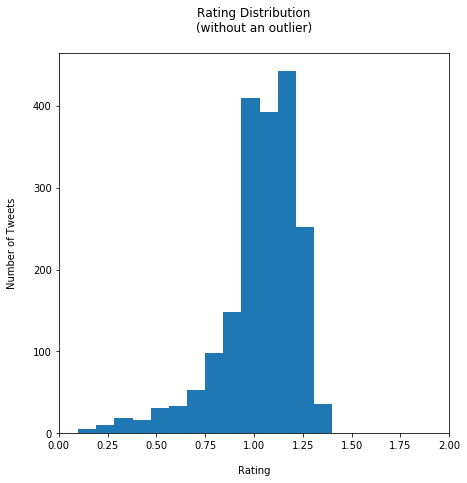

In [1347]:
# create the histogram
plt.figure(figsize = [7, 7])

# rating distribution without outliers
plt.hist(data = rating_dist, x = 'rating', bins = 14)
plt.xlim(0,2);
plt.title('Rating Distribution\n(without an outlier)\n')
plt.xlabel('\nRating')
plt.ylabel('Number of Tweets\n');

In [1348]:
# check the outlier (the most rated dog)     
max_rating = df_master.iloc[df_master.sort_values(by = ['rating'], ascending = False).index[0]].tweet_id
print('The most rated dog is here - https://twitter.com/dog_rates/status/{}'.format(max_rating))

The most rated dog is here - https://twitter.com/dog_rates/status/749981277374128128


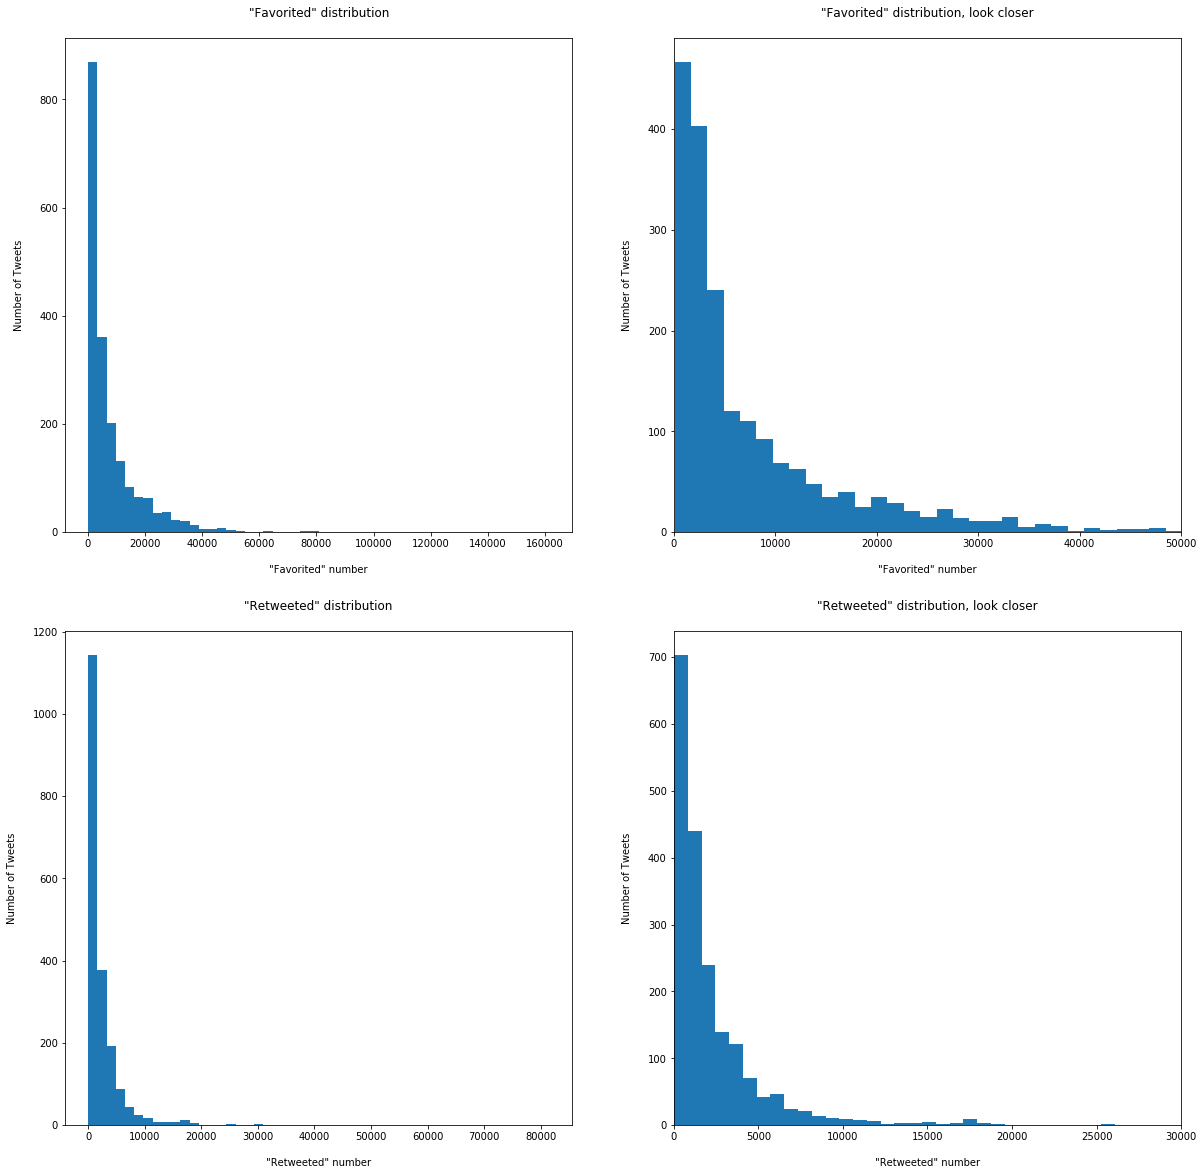

In [1349]:
# create the histogram
plt.figure(figsize = [20, 20])

# favorited distribution 
plt.subplot(2, 2, 1)
plt.hist(data = df_master, x = 'favorite_count', bins = 50)
plt.title('"Favorited" distribution\n')
plt.xlabel('\n"Favorited" number')
plt.ylabel('Number of Tweets\n')

# favorited distribution, look closer 
plt.subplot(2, 2, 2)
plt.hist(data = df_master, x = 'favorite_count', bins = 100)
plt.xlim(0,50000);
plt.title('"Favorited" distribution, look closer\n')
plt.xlabel('\n"Favorited" number')
plt.ylabel('Number of Tweets\n')

# retweeted distribution
plt.subplot(2, 2, 3)
plt.hist(data = df_master, x = 'retweet_count', bins = 50)
plt.title('"Retweeted" distribution\n')
plt.xlabel('\n"Retweeted" number')
plt.ylabel('Number of Tweets\n')

# retweeted distribution, look closer 
plt.subplot(2, 2, 4)
plt.hist(data = df_master, x = 'retweet_count', bins = 100)
plt.xlim(0,30000);
plt.title('"Retweeted" distribution, look closer\n')
plt.xlabel('\n"Retweeted" number')
plt.ylabel('Number of Tweets\n');

In [1350]:
# the most favorited and retweeted dog or dogs
dog_favs = df_master.iloc[df_master.sort_values(by = ['favorite_count'], ascending = False).index[0]].tweet_id
dog_rts = df_master.iloc[df_master.sort_values(by = ['retweet_count'], ascending = False).index[0]].tweet_id
if dog_favs == dog_rts:
    print('The most favorited and retweeted dog is here - https://twitter.com/dog_rates/status/{}'.format(dog_favs))
else:
    print('The most favorited and retweeted dogs are here - https://twitter.com/dog_rates/status/{} and https://twitter.com/dog_rates/status/{}'.format(dog_favs, dog_rts))

The most favorited and retweeted dog is here - https://twitter.com/dog_rates/status/744234799360020481


In [1392]:
# check how many dogs are in each category of the dog stage
df_master.groupby(['dog_stage']).size().reset_index().rename(columns = {0: 'count'})

,dog_stage,count
0,None,1648
1,doggo,63
2,"doggo, pupper",4
3,floofer,7
4,pupper,204
5,puppo,22


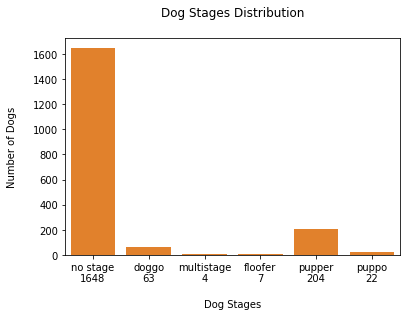

In [1393]:
# create a plot for distribution
sb.countplot(x = 'dog_stage', data = df_master, 
             color = sb.color_palette()[1]).set_xticklabels(['no stage\n' + str(df_master.dog_stage.value_counts()[0]),
                                                             'doggo\n' + str(df_master.dog_stage.value_counts()[1]),
                                                             'multistage\n' + str(df_master.dog_stage.value_counts()[2]), 
                                                             'floofer\n' + str(df_master.dog_stage.value_counts()[3]),
                                                             'pupper\n'+ str(df_master.dog_stage.value_counts()[4]),
                                                             'puppo\n'+ str(df_master.dog_stage.value_counts()[5])]);
plt.xlabel('\nDog Stages\n');
plt.ylabel('Number of Dogs\n');
plt.title('Dog Stages Distribution\n');

**The vast majority of dogs do not have any stage so let see the distribution of a stage only for dogs which have a stage.**

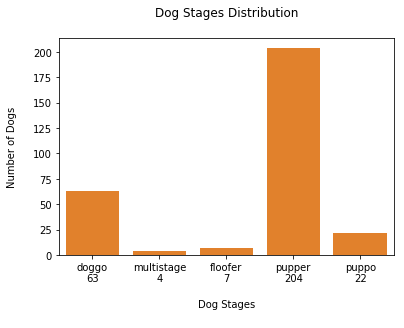

In [1417]:
# remove no_stage category
dogs_stages = df_master.query('dog_stage != "None"')
dogs_stages.dog_stage = dogs_stages.dog_stage.cat.remove_unused_categories()

# create bar chart
sb.countplot(x = 'dog_stage', data = dogs_stages, 
             color = sb.color_palette()[1]).set_xticklabels(['doggo\n' + str(df_master.dog_stage.value_counts()[1]),
                                                             'multistage\n' + str(df_master.dog_stage.value_counts()[2]), 
                                                             'floofer\n' + str(df_master.dog_stage.value_counts()[3]),
                                                             'pupper\n'+ str(df_master.dog_stage.value_counts()[4]),
                                                             'puppo\n'+ str(df_master.dog_stage.value_counts()[5])]);
plt.xlabel('\nDog Stages\n');
plt.ylabel('Number of Dogs\n');
plt.title('Dog Stages Distribution\n');

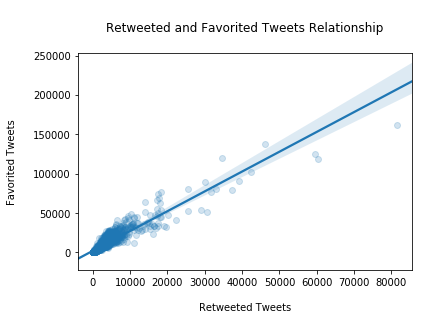

In [1416]:
# check is there any realtion between favorited and retweeted posts
sb.regplot(data = df_master, x = 'retweet_count', y = 'favorite_count', scatter_kws = {'alpha' : 1/5}, 
           color = sb.color_palette()[0]);
plt.xlabel('\nRetweeted Tweets');
plt.ylabel('Favorited Tweets\n');
plt.title(' \nRetweeted and Favorited Tweets Relationship\n');

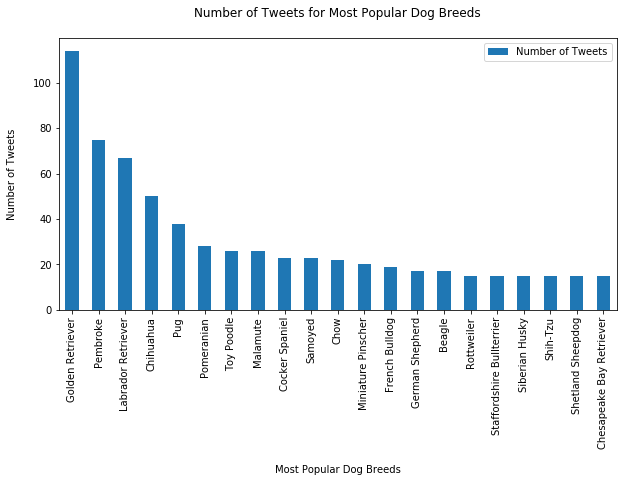

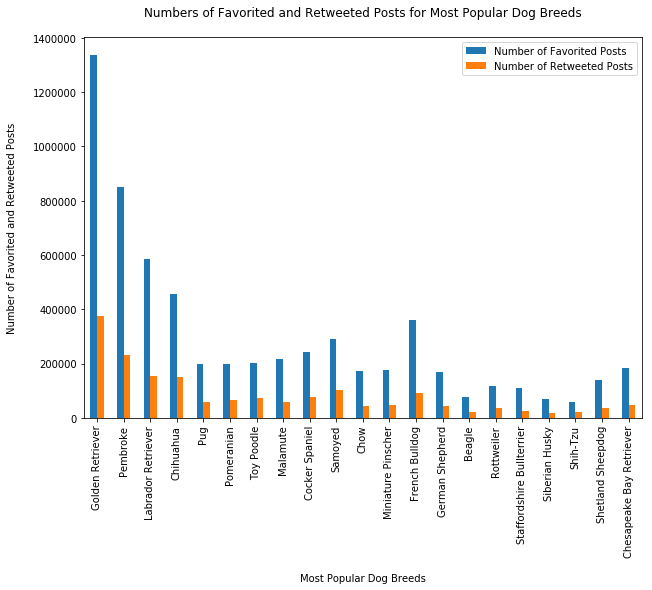

In [1401]:
# create a dataframewith only the rows where all three predictions are a dog from first prediction, 
# favorite_count and retweet_count  
dogs_faves_rts = df_master.query('dog_or_not_1 == True and dog_or_not_2 == True and dog_or_not_3 == True')
dogs_faves_rts = dogs_faves_rts[['favorite_count', 'retweet_count', 'prediction_1']]

# add new column with number of tweets for the each dog breed
dogs_faves_rts['tweet_count'] = dogs_faves_rts.groupby(['prediction_1'])['favorite_count'].transform('count')

# tweet_count as index and order by index
dogs_faves_rts.set_index('tweet_count', inplace = True)

# choose most popular dog breeds (with 15 or more tweets)
popular_dogs = dogs_faves_rts.prediction_1.value_counts()
index_popular_dogs = popular_dogs[popular_dogs >= 15].index
index_popular_dogs

# create a dataframe with most popular dog breeds, tweet_count, sum of favorite_count, sum of retweet_count
pop_dogs_faves_rts_twt = dogs_faves_rts.loc[dogs_faves_rts.prediction_1.isin(index_popular_dogs)].groupby(by = [
    'tweet_count', 'prediction_1']).sum().reset_index(inplace = False).sort_values(by = [
    'tweet_count'], ascending = False)

# create plot for number of tweets for most popular dog breeds
pop_dogs_faves_rts_twt.plot(kind = 'bar', figsize = (10, 5), x = 'prediction_1', y = 'tweet_count');
plt.title('Number of Tweets for Most Popular Dog Breeds\n')
plt.xlabel('\nMost Popular Dog Breeds')
plt.ylabel('Number of Tweets\n')
plt.legend(['Number of Tweets']);

# create plot for numbers of favorited and retweeted tweets for most popular dog breeds
pop_dogs_faves_rts_twt.plot(kind = 'bar', figsize = (10, 7), x = 'prediction_1', y = ['favorite_count', 
                                                                                      'retweet_count']);
plt.title('Numbers of Favorited and Retweeted Posts for Most Popular Dog Breeds\n')
plt.xlabel('\nMost Popular Dog Breeds')
plt.ylabel('Number of Favorited and Retweeted Posts\n')
plt.legend(['Number of Favorited Posts', 'Number of Retweeted Posts']);

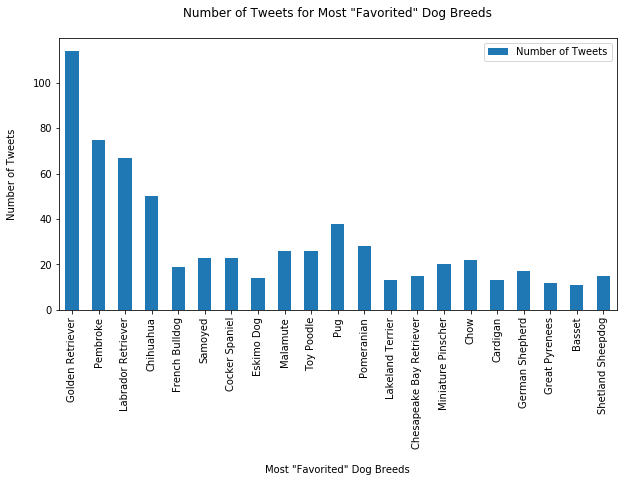

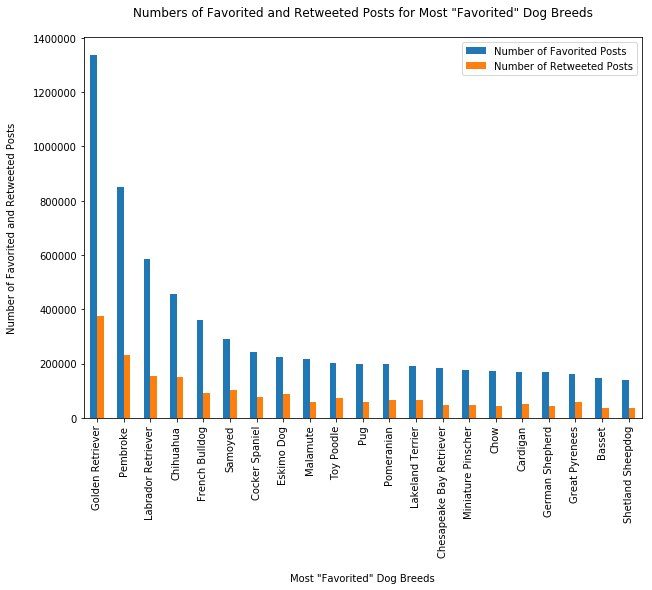

In [1402]:
# create a dataframewith only the rows where all three predictions are a dog from first prediction, 
# favorite_count and retweet_count  
dogs_faves_rts_2 = df_master.query('dog_or_not_1 == True and dog_or_not_2 == True and dog_or_not_3 == True')
dogs_faves_rts_2 = dogs_faves_rts_2[['favorite_count', 'retweet_count', 'prediction_1']]

# add new column with number of tweets for the each dog breed
dogs_faves_rts_2['tweet_count'] = dogs_faves_rts_2.groupby(['prediction_1'])['favorite_count'].transform('count')

# tweet_count as index
dogs_faves_rts_2.set_index('tweet_count', inplace = True)

# create a dataframe with most "favorited" dogs, tweet_count, sum of favorite_count, sum of retweet_count
all_dogs_faves_rts_twt = dogs_faves_rts_2.groupby(by = ['tweet_count', 
    'prediction_1']).sum().reset_index(inplace = False).sort_values(by = [
    'favorite_count'], ascending = False).head(21)

# create plot for number of tweets for most "favorited" dog breeds
all_dogs_faves_rts_twt.plot(kind = 'bar', figsize = (10, 5), x = 'prediction_1', y = 'tweet_count');
plt.title('Number of Tweets for Most "Favorited" Dog Breeds\n')
plt.xlabel('\nMost "Favorited" Dog Breeds')
plt.ylabel('Number of Tweets\n')
plt.legend(['Number of Tweets'])

# create plot for numbers of favorited and retweeted tweets for most "favorited" dog breeds
all_dogs_faves_rts_twt.plot(kind = 'bar', figsize = (10, 7), x = 'prediction_1', y = ['favorite_count', 
                                                                                      'retweet_count']);
plt.title('Numbers of Favorited and Retweeted Posts for Most "Favorited" Dog Breeds\n')
plt.xlabel('\nMost "Favorited" Dog Breeds')
plt.ylabel('Number of Favorited and Retweeted Posts\n')
plt.legend(['Number of Favorited Posts', 'Number of Retweeted Posts']);

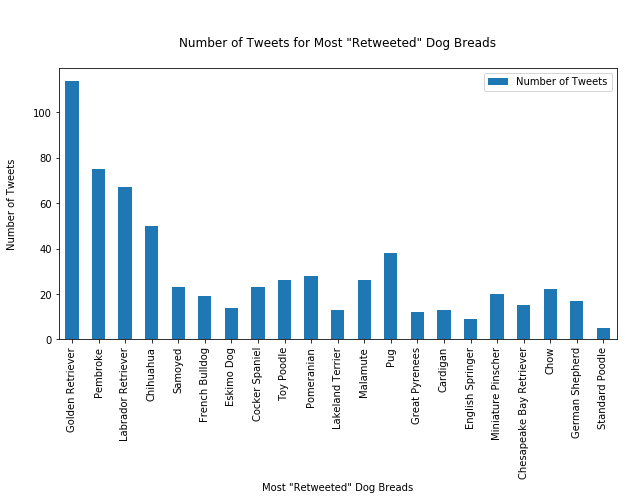

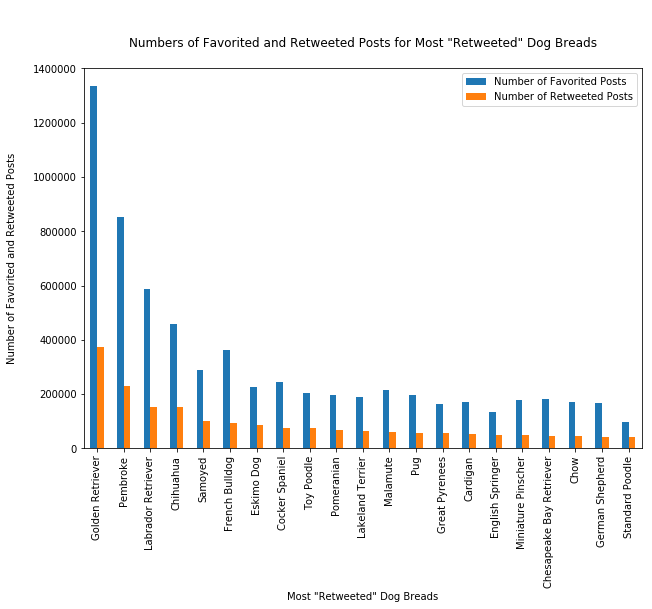

In [1404]:
# create a dataframewith only the rows where all three predictions are a dog from first prediction, 
# favorite_count and retweet_count  
dogs_faves_rts_3 = df_master.query('dog_or_not_1 == True and dog_or_not_2 == True and dog_or_not_3 == True')
dogs_faves_rts_3 = dogs_faves_rts_3[['favorite_count', 'retweet_count', 'prediction_1']]

# add new column with number of tweets for the each dog breed
dogs_faves_rts_3['tweet_count'] = dogs_faves_rts_3.groupby(['prediction_1'])['favorite_count'].transform('count')

# tweet_count as index
dogs_faves_rts_3.set_index('tweet_count', inplace = True)

# create a dataframe with most "retweeted" dog breeds dogs, tweet_count, sum of favorite_count, 
# sum of retweet_count
all_dogs_faves_rts_twt = dogs_faves_rts_3.groupby(by = ['tweet_count', 
    'prediction_1']).sum().reset_index(inplace = False).sort_values(by = [
    'retweet_count'], ascending = False).head(21)

# create plot for number of tweets for most "retweeted" dog breeds
all_dogs_faves_rts_twt.plot(kind = 'bar', figsize = (10, 5), x = 'prediction_1', y = 'tweet_count');
plt.title('\n\nNumber of Tweets for Most "Retweeted" Dog Breads\n')
plt.xlabel('Most "Retweeted" Dog Breads')
plt.ylabel('Number of Tweets\n')
plt.legend(['Number of Tweets'])

# create plot for numbers of favorited and retweeted tweets for most "retweeted" dog breeds
all_dogs_faves_rts_twt.plot(kind = 'bar', figsize = (10, 7), x = 'prediction_1', y = ['favorite_count', 
                                                                                      'retweet_count']);
plt.title('\n\nNumbers of Favorited and Retweeted Posts for Most "Retweeted" Dog Breads\n')
plt.xlabel('Most "Retweeted" Dog Breads')
plt.ylabel('Number of Favorited and Retweeted Posts\n')
plt.legend(['Number of Favorited Posts', 'Number of Retweeted Posts']);

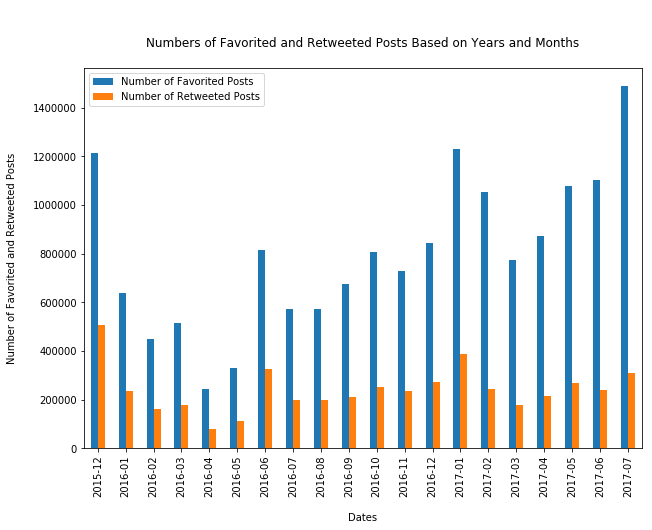

In [1414]:
# create a dataframe merging archive_tweets and images_clean
time_faves_rts = df_master.copy()

# transform the dataframe to new dataframe with sums of favorited and retweeted posts for the each months
# except for first and last months since there are incomplete
time_faves_rts.timestamp = time_faves_rts.timestamp.dt.strftime('%Y-%m')
time_faves_rts = time_faves_rts[['favorite_count', 'retweet_count', 'timestamp']]
time_faves_rts = time_faves_rts.groupby(['timestamp']).agg({
    'favorite_count': 'sum', 'retweet_count': 'sum'}).reset_index(inplace = False)[1:-1]

# create plot for numbers of favorited and retweeted tweets for most favorited dogs
time_faves_rts.plot(kind = 'bar', figsize = (10, 7), x = 'timestamp', y = ['favorite_count', 'retweet_count']);
plt.title('\n\nNumbers of Favorited and Retweeted Posts Based on Years and Months\n')
plt.xlabel('\nDates')
plt.ylabel('Number of Favorited and Retweeted Posts\n')
plt.legend(['Number of Favorited Posts', 'Number of Retweeted Posts']);

<a id='resources'></a>
## Resources

https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object  
https://stackoverflow.com/questions/48157921/saving-tweets-to-json-file-in-python-3-6    
https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json  
https://stackoverflow.com/questions/17157753/get-the-error-code-from-tweepy-exception-instance  
https://docs.python.org/3.7/tutorial/errors.html    
https://stackoverflow.com/questions/43831539/how-to-select-rows-with-nan-in-particular-column  
https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas  
https://stackoverflow.com/questions/988228/convert-a-string-representation-of-a-dictionary-to-a-dictionary
https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe  
https://stackoverflow.com/questions/43269548/pandas-how-to-remove-rows-from-a-dataframe-based-on-a-list  
https://stackoverflow.com/questions/49586471/add-new-column-to-python-pandas-dataframe-based-on-multiple-conditions https://docs.python.org/2/library/re.html#re.MatchObject  
https://stackoverflow.com/questions/27474921/compare-two-columns-using-pandas  
https://stackoverflow.com/questions/41968732/set-order-of-columns-in-pandas-dataframe  
https://stackoverflow.com/questions/48064965/drop-unused-categories-using-groupby-on-categorical-variable-in-pandas?noredirect=1&lq=1  
https://stackoverflow.com/questions/42967848/how-to-subset-a-pandas-series-based-on-value  
https://datascience.stackexchange.com/questions/47023/pandas-merge-column-duplicate-and-sum-value  
https://stackoverflow.com/questions/26921651/how-to-delete-the-last-row-of-data-of-a-pandas-dataframe  